In [1]:
import warnings
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize']= 20,8


In [2]:
df = pd.read_csv('Sparkling.csv',parse_dates=True , index_col=[0])

In [3]:
df.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [4]:
df.isna().sum()

Sparkling    0
dtype: int64

## Plot the Time Series to understand the behaviour of the data

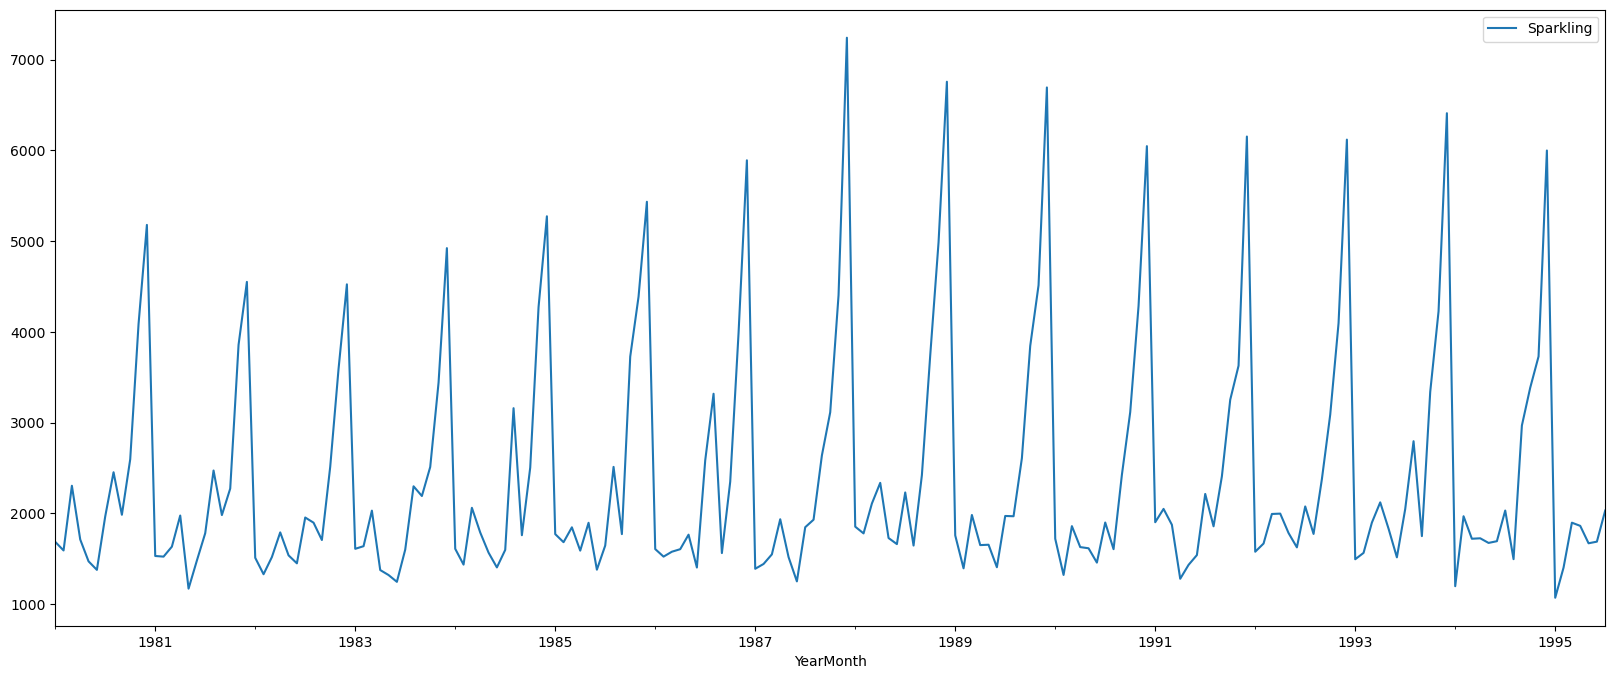

In [5]:
df.plot();

There seems to be a trend with a seasonality as well

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [7]:
round(df.describe(),3)

Sparkling
count    187.000
mean    2402.417
std     1295.112
min     1070.000
25%     1605.000
50%     1874.000
75%     2549.000
max     7242.000

## Plot a boxplot to understand the spread across different years and within different months across years.

### Yearly Boxplot

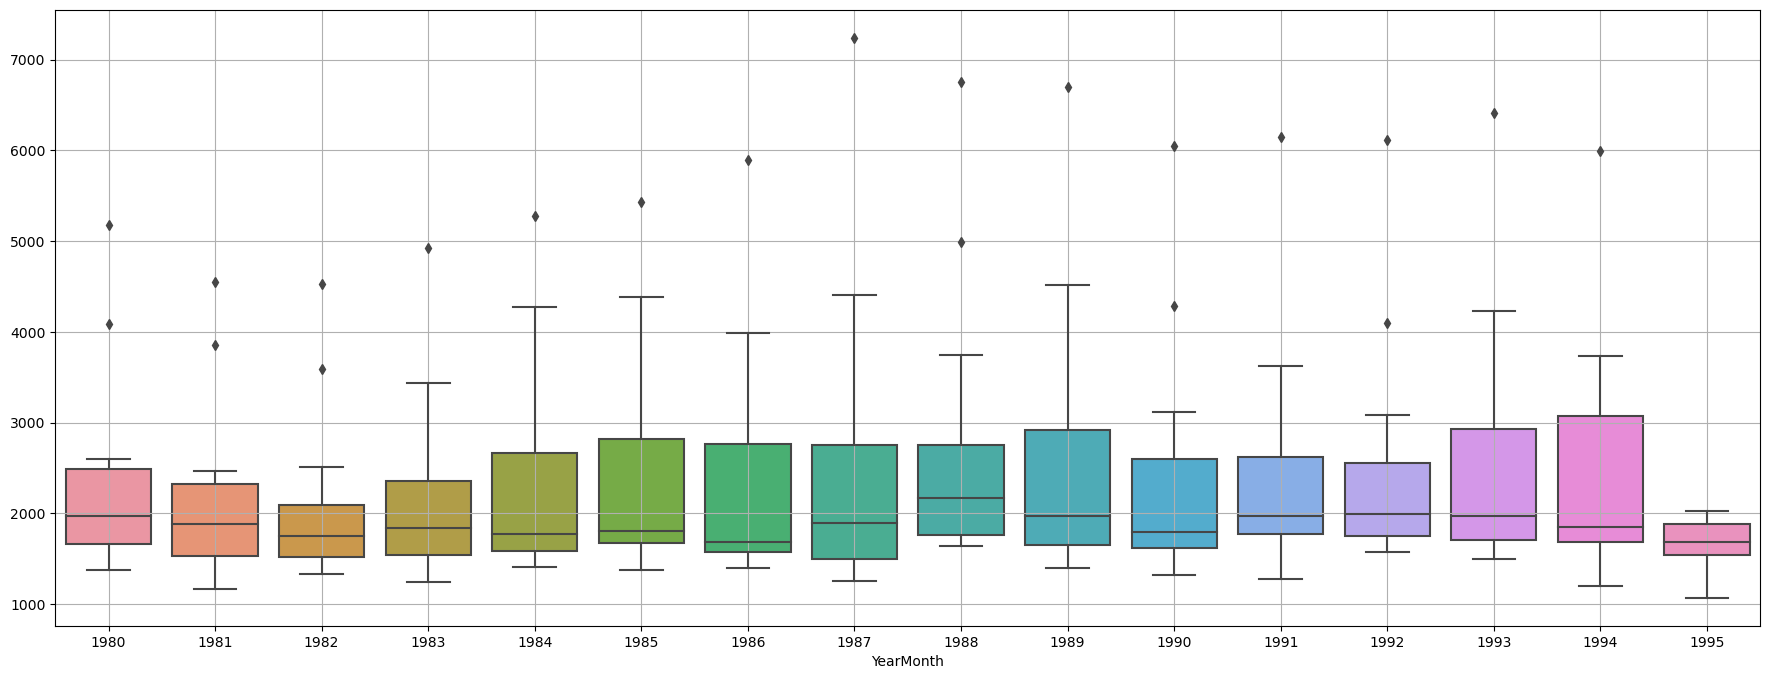

In [8]:
_, ax = plt.subplots(figsize =(22,8))
sns.boxplot(x = df.index.year, y = df.values[:,0],ax=ax)
plt.grid();

### Monthly Boxplot

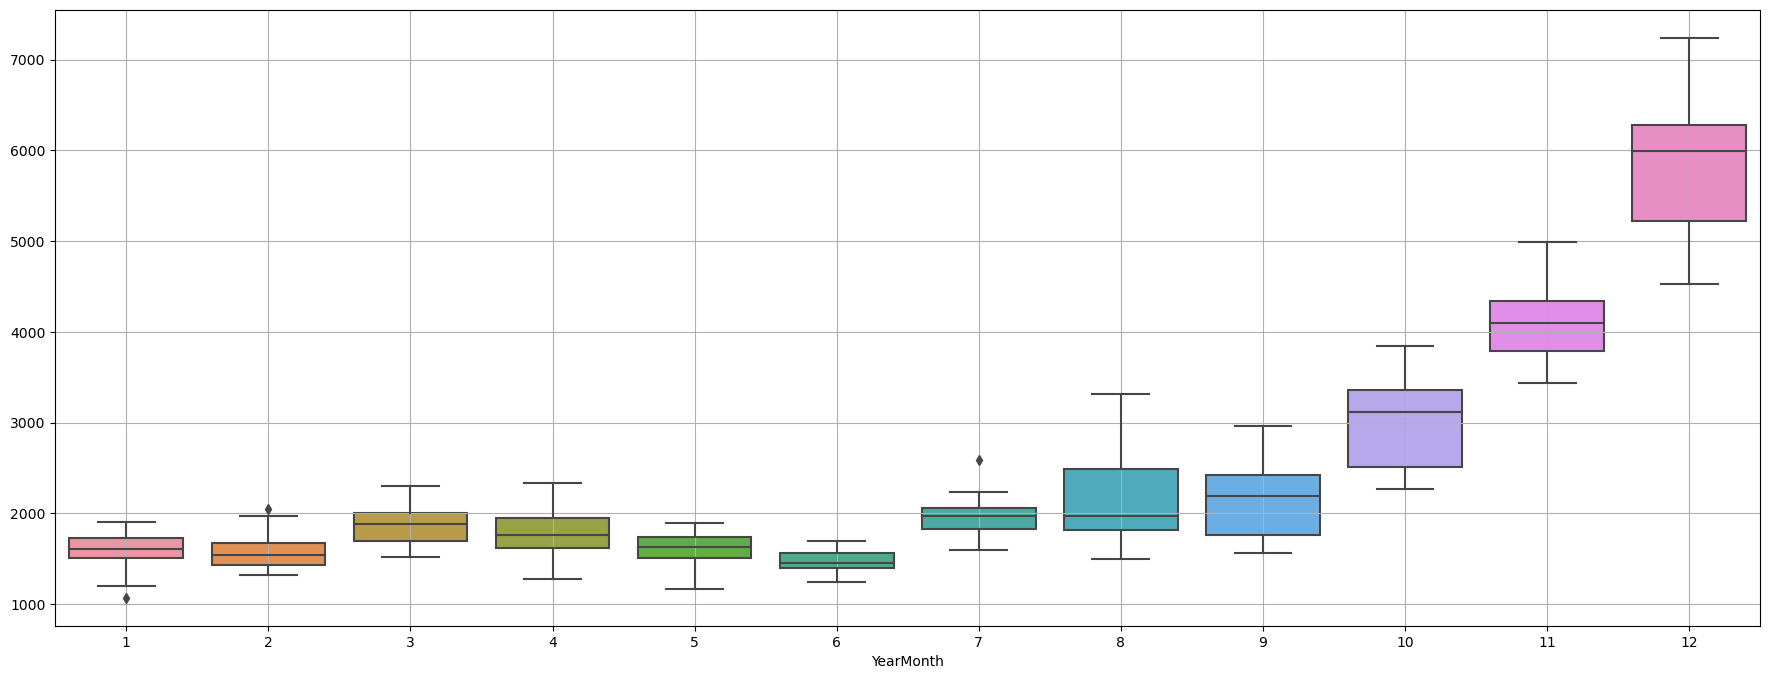

In [9]:
_, ax = plt.subplots(figsize =(22,8))
sns.boxplot(x = df.index.month, y = df.values[:,0],ax=ax)
plt.grid();

In [10]:
yearly_sales_across_months = pd.pivot_table(df,values='Sparkling',columns=df.index.month_name(),index=df.index.year)
yearly_sales_across_months

YearMonth   April  August  December  February  January    July    June  \
YearMonth                                                                
1980       1712.0  2453.0    5179.0    1591.0   1686.0  1966.0  1377.0   
1981       1976.0  2472.0    4551.0    1523.0   1530.0  1781.0  1480.0   
1982       1790.0  1897.0    4524.0    1329.0   1510.0  1954.0  1449.0   
1983       1375.0  2298.0    4923.0    1638.0   1609.0  1600.0  1245.0   
1984       1789.0  3159.0    5274.0    1435.0   1609.0  1597.0  1404.0   
1985       1589.0  2512.0    5434.0    1682.0   1771.0  1645.0  1379.0   
1986       1605.0  3318.0    5891.0    1523.0   1606.0  2584.0  1403.0   
1987       1935.0  1930.0    7242.0    1442.0   1389.0  1847.0  1250.0   
1988       2336.0  1645.0    6757.0    1779.0   1853.0  2230.0  1661.0   
1989       1650.0  1968.0    6694.0    1394.0   1757.0  1971.0  1406.0   
1990       1628.0  1605.0    6047.0    1321.0   1720.0  1899.0  1457.0   
1991       1279.0  1857.0    6153.0    2049.0   1902.0  2214.0  1540.0   
1992       1997.0  1773.0    6119.0    1667.0   1577.0  2076.0  1625.0   
1993       2121.0  2795.0    6410.0    1564.0   1494.0  2048.0  1515.0   
1994       1725.0  1495.0    5999.0    1968.0   1197.0  2031.0  1693.0   
1995       1862.0     NaN       NaN    1402.0   1070.0  2031.0  1688.0   

YearMonth   March     May  November  October  September  
YearMonth                                                
1980       2304.0  1471.0    4087.0   2596.0     1984.0  
1981       1633.0  1170.0    3857.0   2273.0     1981.0  
1982       1518.0  1537.0    3593.0   2514.0     1706.0  
1983       2030.0  1320.0    3440.0   2511.0     2191.0  
1984       2061.0  1567.0    4273.0   2504.0     1759.0  
1985       1846.0  1896.0    4388.0   3727.0     1771.0  
1986       1577.0  1765.0    3987.0   2349.0     1562.0  
1987       1548.0  1518.0    4405.0   3114.0     2638.0  
1988       2108.0  1728.0    4988.0   3740.0     2421.0  
1989       1982.0  1654.0    4514.0   3845.0     2608.0  
1990       1859.0  1615.0    4286.0   3116.0     2424.0  
1991       1874.0  1432.0    3627.0   3252.0     2408.0  
1992       1993.0  1783.0    4096.0   3088.0     2377.0  
1993       1898.0  1831.0    4227.0   3339.0     1749.0  
1994       1720.0  1674.0    3729.0   3385.0     2968.0  
1995       1897.0  1670.0       NaN      NaN        NaN

In [11]:
yearly_sales_across_year = pd.pivot_table(df,values='Sparkling',columns=df.index.year,index=df.index.month_name())
yearly_sales_across_year

YearMonth    1980    1981    1982    1983    1984    1985    1986    1987  \
YearMonth                                                                   
April      1712.0  1976.0  1790.0  1375.0  1789.0  1589.0  1605.0  1935.0   
August     2453.0  2472.0  1897.0  2298.0  3159.0  2512.0  3318.0  1930.0   
December   5179.0  4551.0  4524.0  4923.0  5274.0  5434.0  5891.0  7242.0   
February   1591.0  1523.0  1329.0  1638.0  1435.0  1682.0  1523.0  1442.0   
January    1686.0  1530.0  1510.0  1609.0  1609.0  1771.0  1606.0  1389.0   
July       1966.0  1781.0  1954.0  1600.0  1597.0  1645.0  2584.0  1847.0   
June       1377.0  1480.0  1449.0  1245.0  1404.0  1379.0  1403.0  1250.0   
March      2304.0  1633.0  1518.0  2030.0  2061.0  1846.0  1577.0  1548.0   
May        1471.0  1170.0  1537.0  1320.0  1567.0  1896.0  1765.0  1518.0   
November   4087.0  3857.0  3593.0  3440.0  4273.0  4388.0  3987.0  4405.0   
October    2596.0  2273.0  2514.0  2511.0  2504.0  3727.0  2349.0  3114.0   
September  1984.0  1981.0  1706.0  2191.0  1759.0  1771.0  1562.0  2638.0   

YearMonth    1988    1989    1990    1991    1992    1993    1994    1995  
YearMonth                                                                  
April      2336.0  1650.0  1628.0  1279.0  1997.0  2121.0  1725.0  1862.0  
August     1645.0  1968.0  1605.0  1857.0  1773.0  2795.0  1495.0     NaN  
December   6757.0  6694.0  6047.0  6153.0  6119.0  6410.0  5999.0     NaN  
February   1779.0  1394.0  1321.0  2049.0  1667.0  1564.0  1968.0  1402.0  
January    1853.0  1757.0  1720.0  1902.0  1577.0  1494.0  1197.0  1070.0  
July       2230.0  1971.0  1899.0  2214.0  2076.0  2048.0  2031.0  2031.0  
June       1661.0  1406.0  1457.0  1540.0  1625.0  1515.0  1693.0  1688.0  
March      2108.0  1982.0  1859.0  1874.0  1993.0  1898.0  1720.0  1897.0  
May        1728.0  1654.0  1615.0  1432.0  1783.0  1831.0  1674.0  1670.0  
November   4988.0  4514.0  4286.0  3627.0  4096.0  4227.0  3729.0     NaN  
October    3740.0  3845.0  3116.0  3252.0  3088.0  3339.0  3385.0     NaN  
September  2421.0  2608.0  2424.0  2408.0  2377.0  1749.0  2968.0     NaN

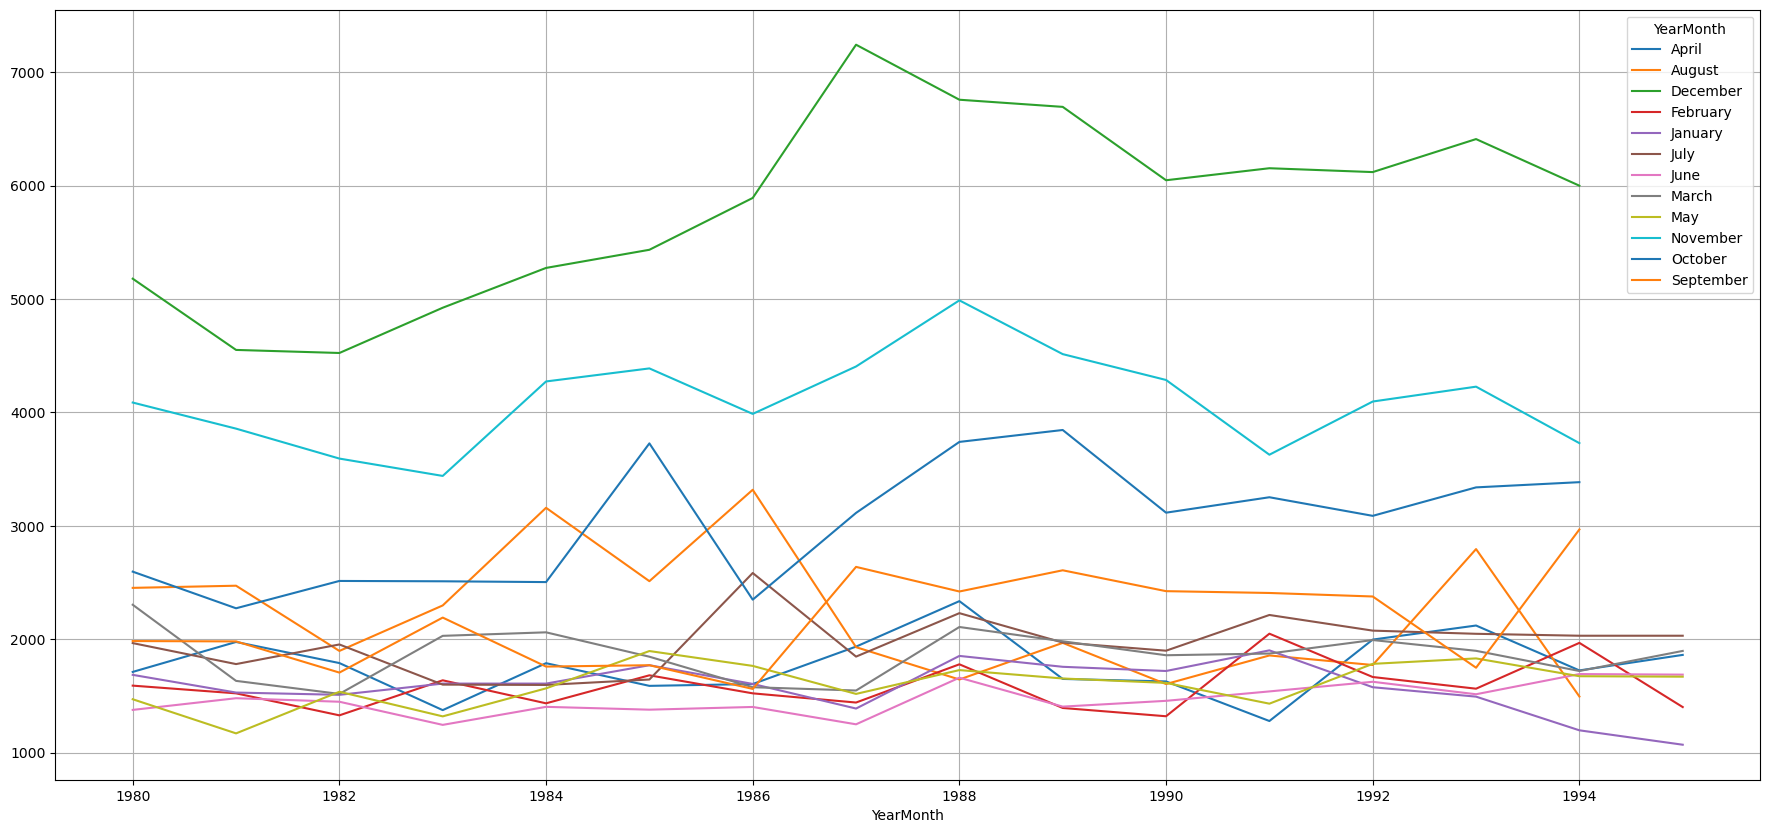

In [12]:
fig,ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax =ax)
plt.grid();

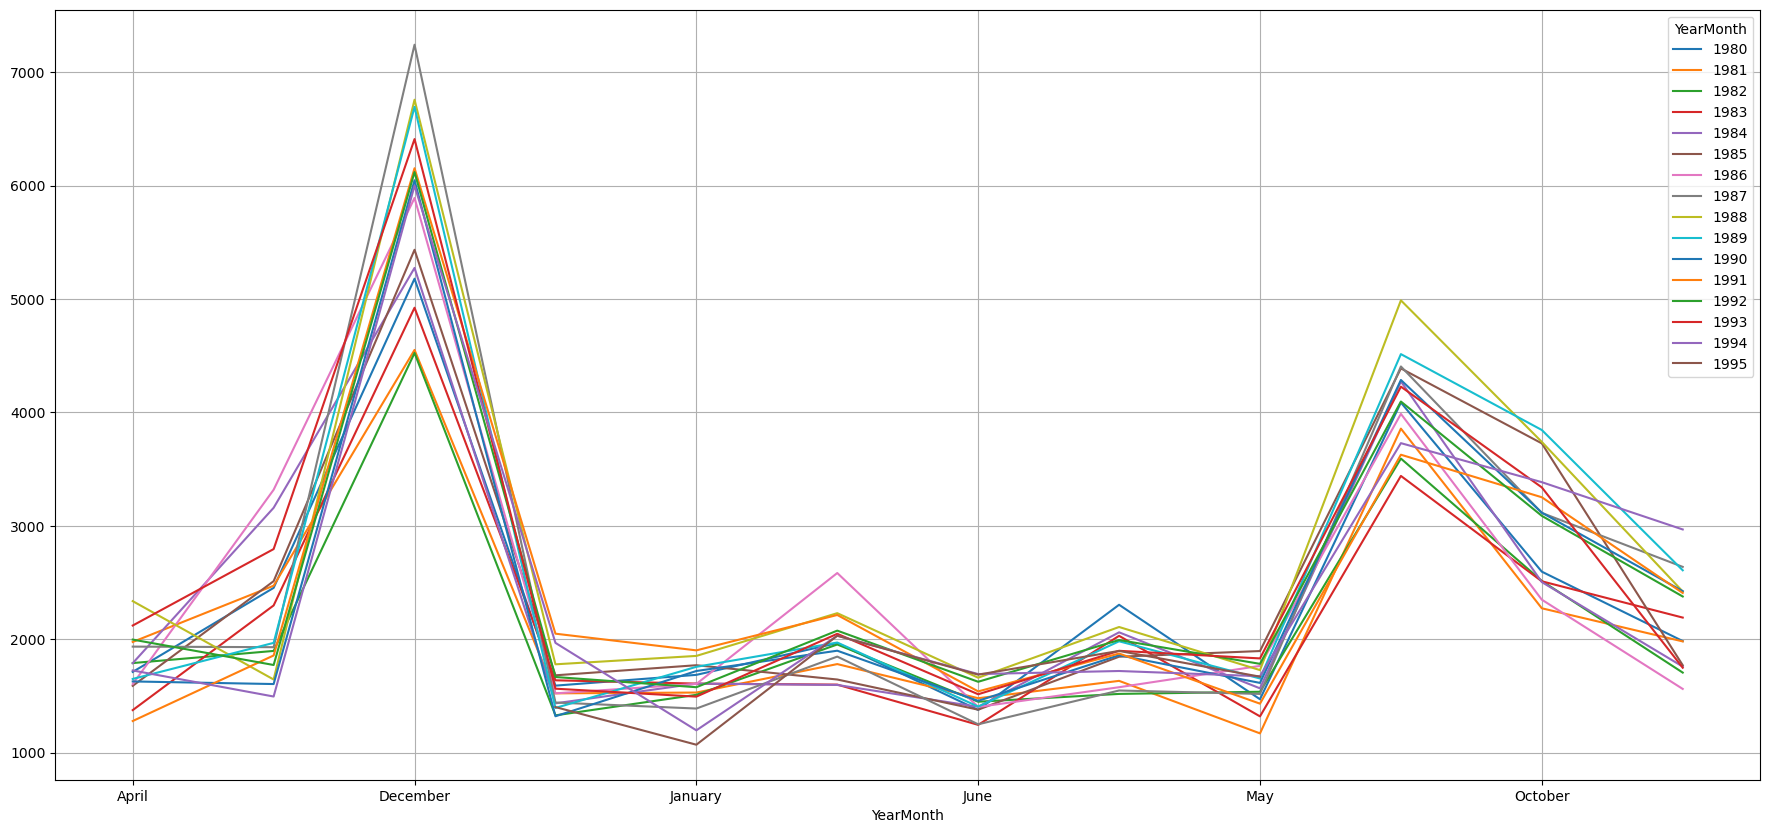

In [13]:
fig,ax = plt.subplots(figsize=(22,10))
yearly_sales_across_year.plot(ax =ax)
plt.grid();

### Decompose the Time Series

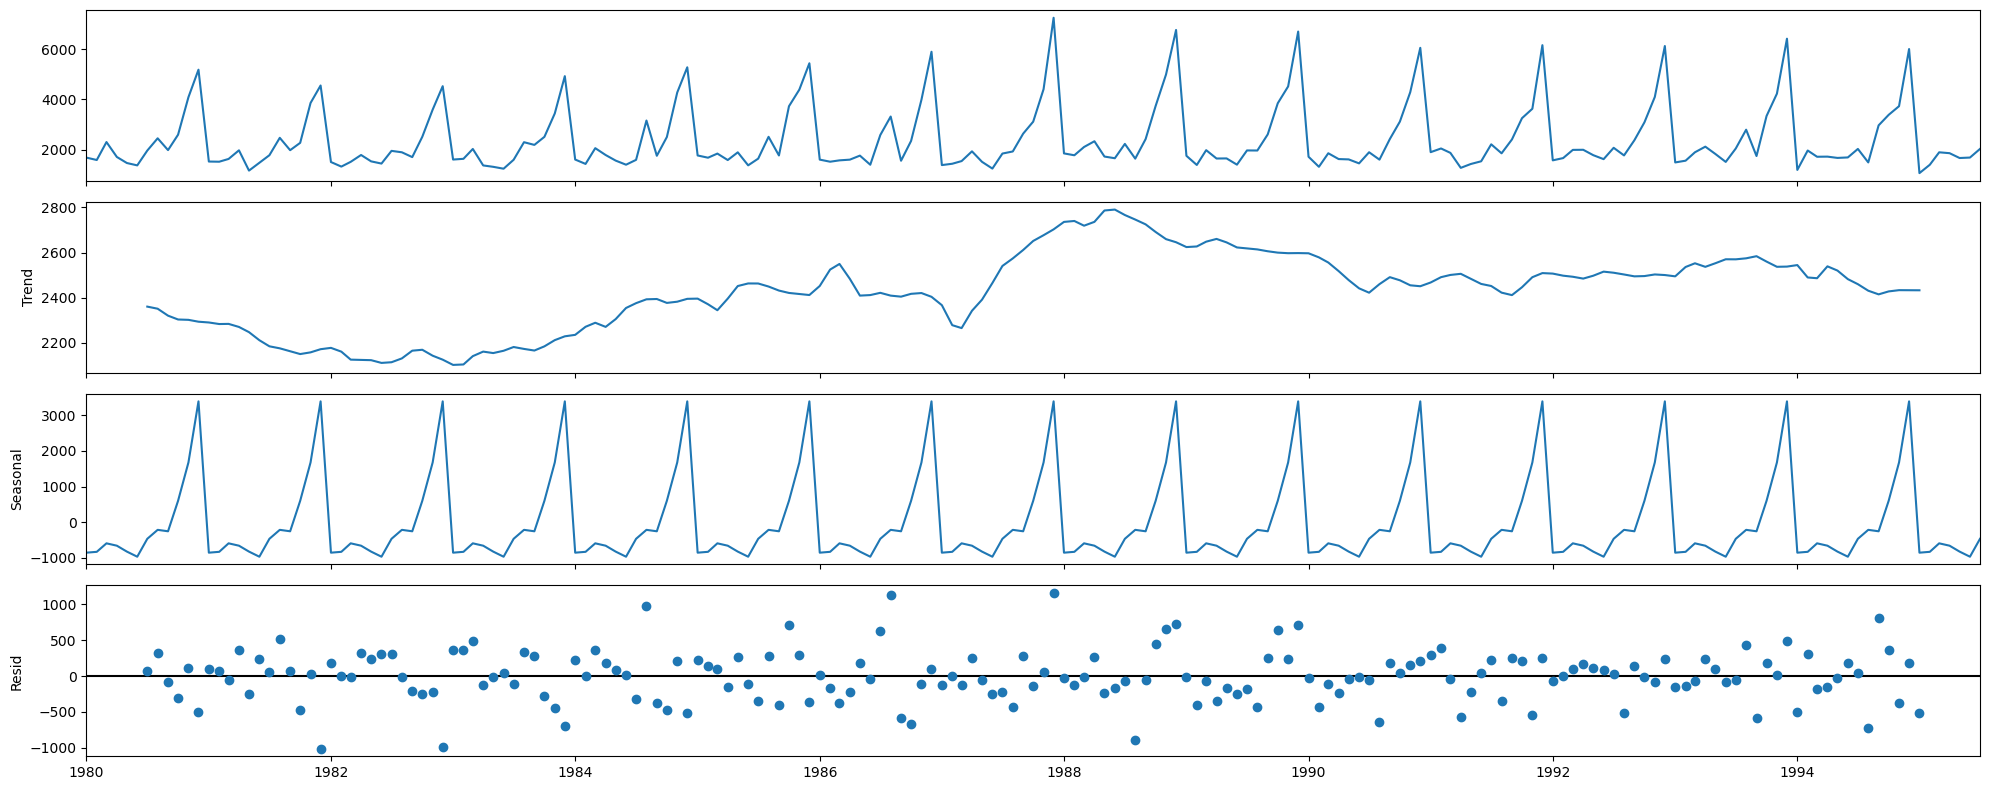

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df, model='additive')
decomposition.plot();

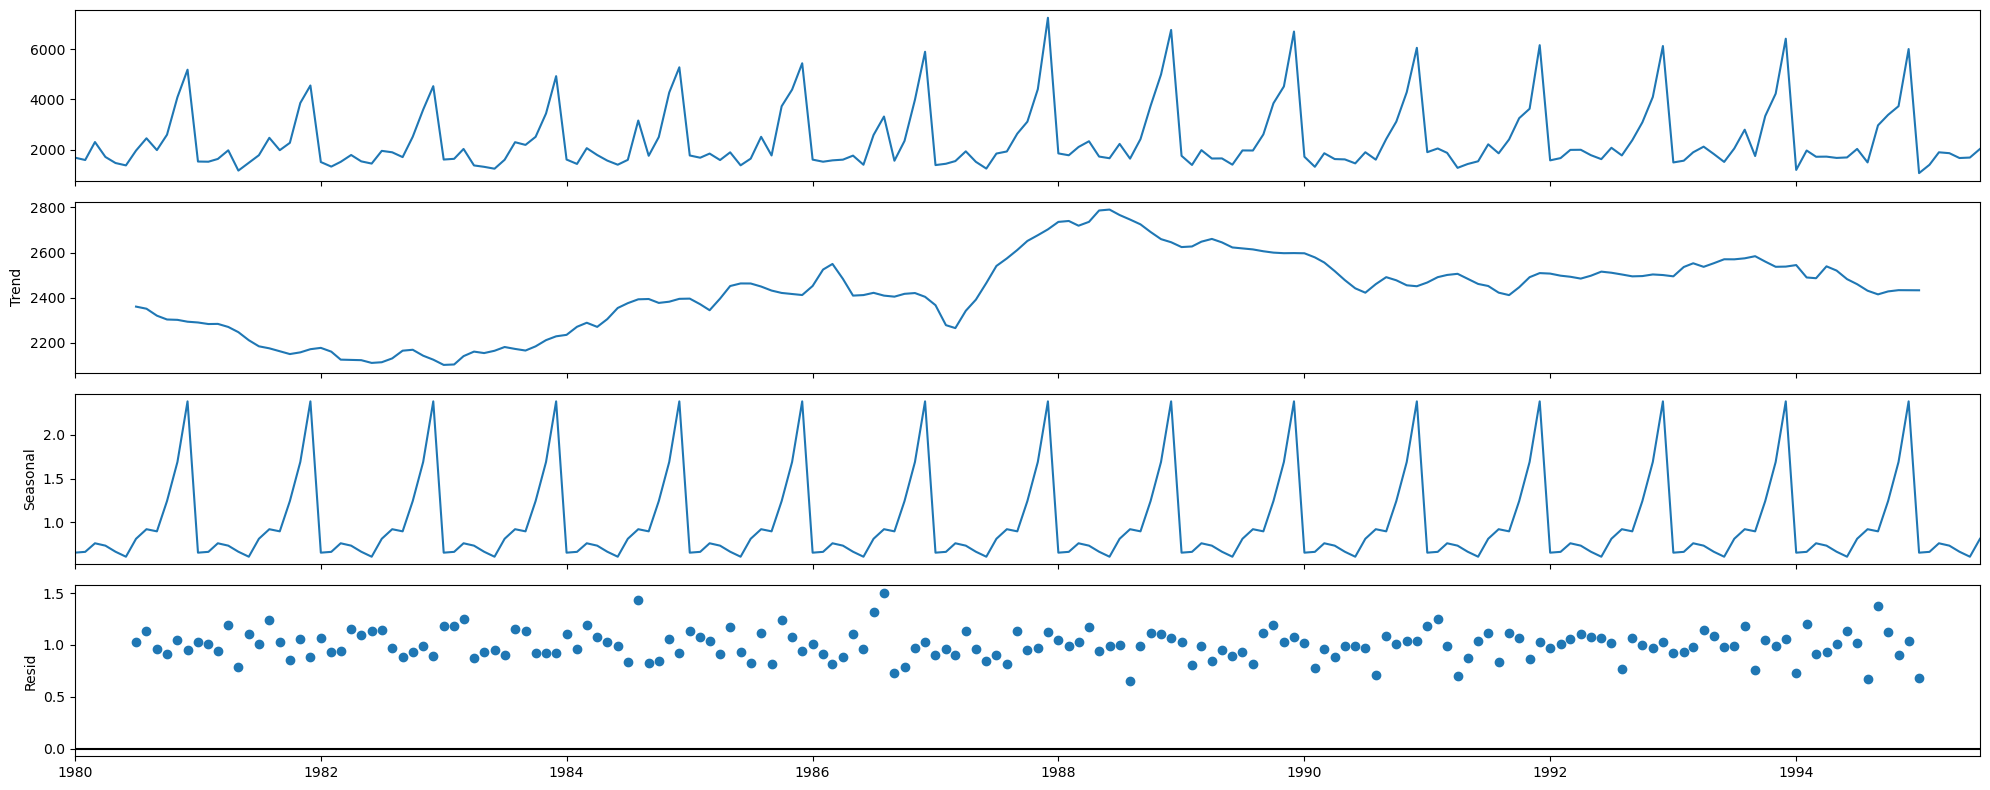

In [15]:
decomposition = seasonal_decompose(df, model='multiplicative')
decomposition.plot();

While comparing the two model additive and multiplicative, residuals in multiplicative shows less pattern of variation.

In [16]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [17]:
round(residual.mean(),2)

1.0

In [18]:
print('Trend','\n',trend,'\n')
print('Seasonality','\n',seasonality,'\n')
print('Residual','\n',residual,'\n')

Trend 
 YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: trend, Length: 187, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
                ...   
1995-03-01    0.757440
1995-04-01    0.730351
1995-05-01    0.660609
1995-06-01    0.603468
1995-07-01    0.809164
Name: seasonal, Length: 187, dtype: float64 

Residual 
 YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: resid, Length: 187, dtype: float64 



In [19]:
deseasonlized_ts = trend * residual
deseasonlized_ts.head()

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
dtype: float64

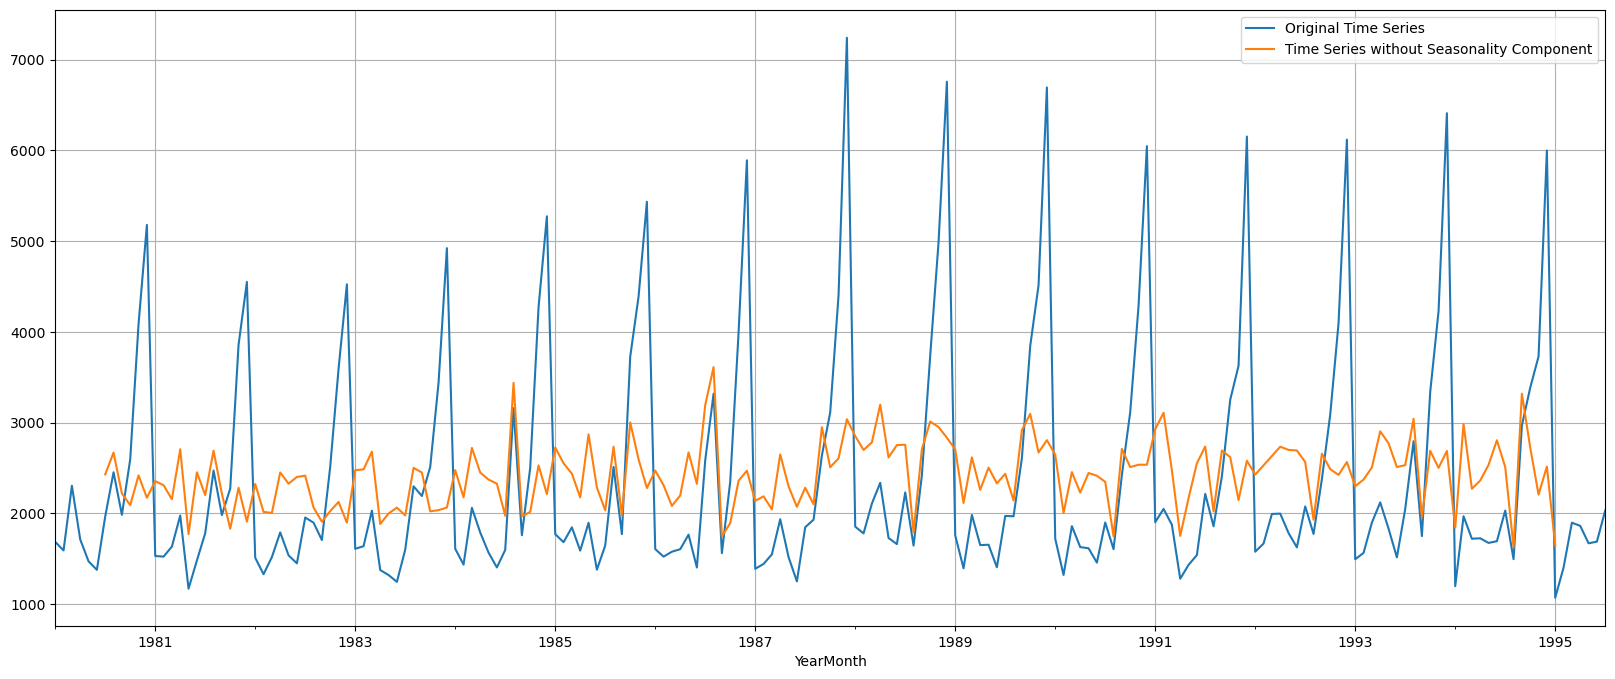

In [20]:
df.plot()
deseasonlized_ts.plot()
plt.legend(['Original Time Series', 'Time Series without Seasonality Component'])
plt.grid();

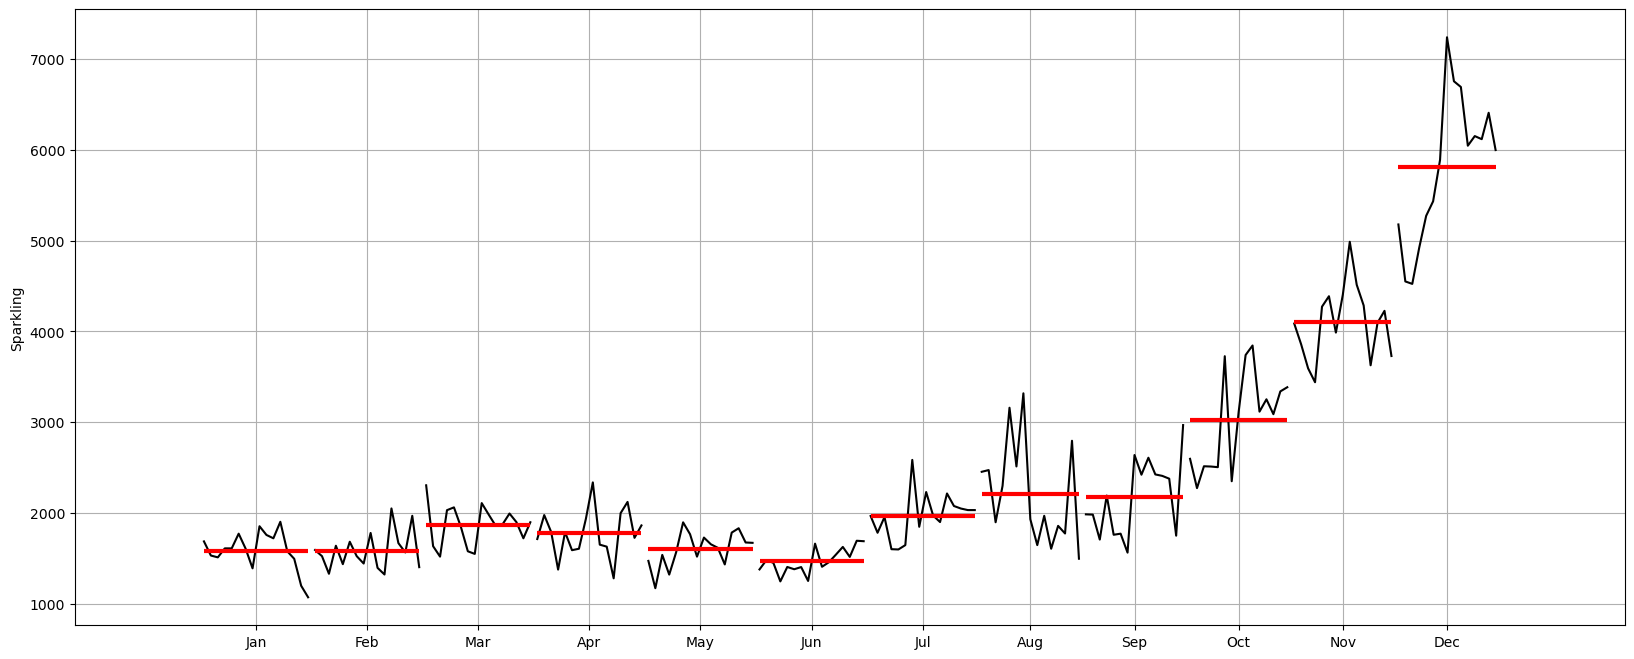

In [21]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['Sparkling'],ylabel='Sparkling')
plt.grid();

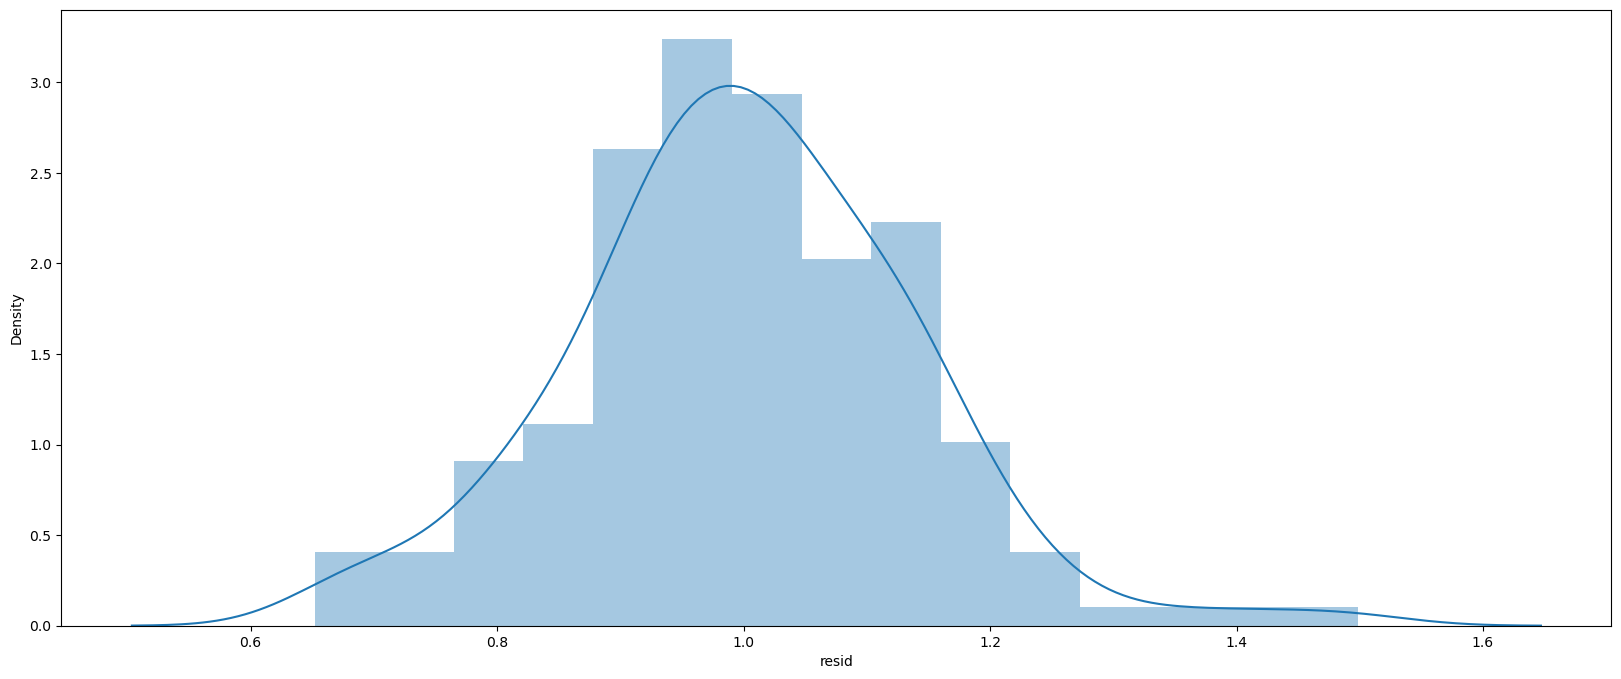

In [22]:
sns.distplot(residual);

In [23]:
from scipy import stats
stats.shapiro(residual.dropna())

ShapiroResult(statistic=0.9859988689422607, pvalue=0.07802142202854156)

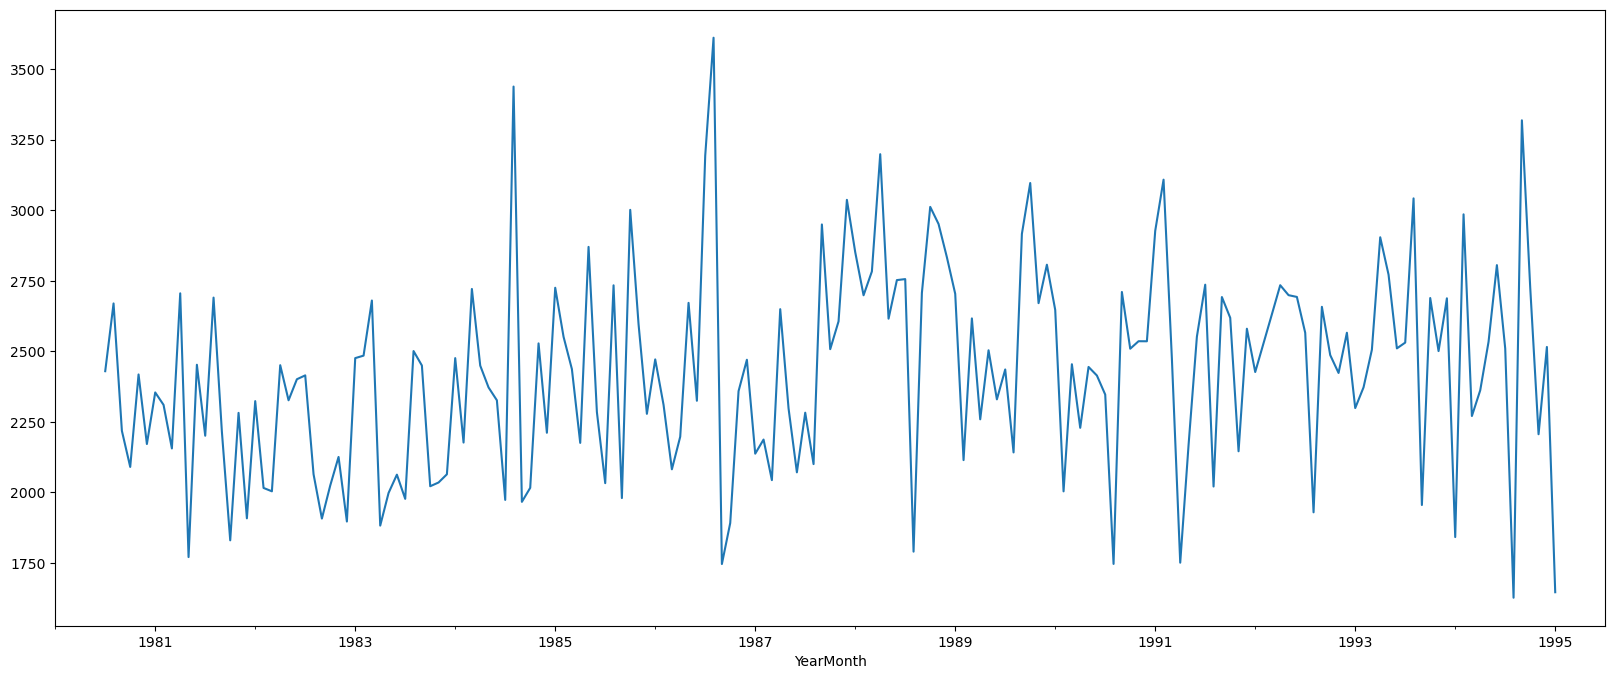

In [24]:
deseasonlized_ts.plot();

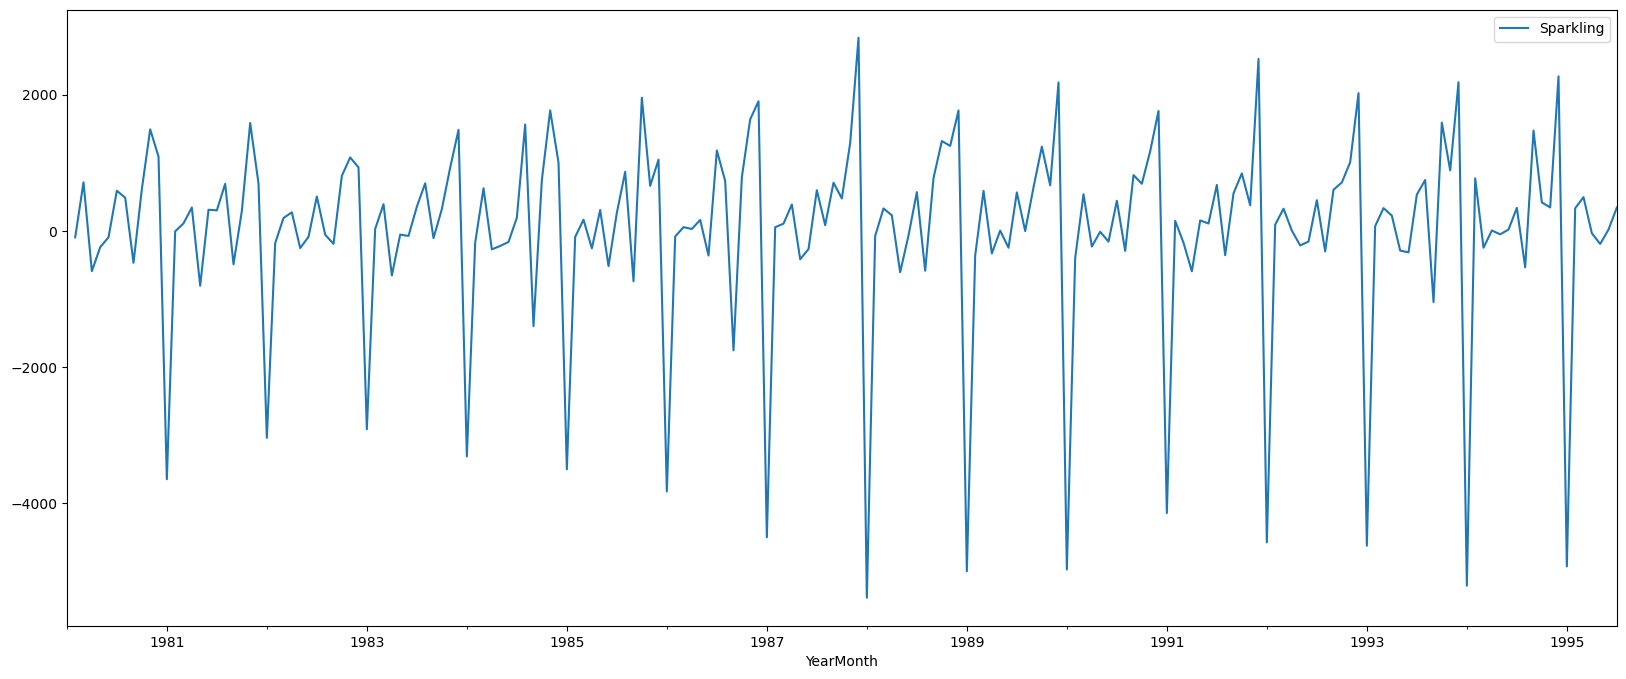

In [25]:
df.diff().plot();

### Split the data into train and test and plot the training and test data

In [26]:
train = df[df.index.year <1991]
test = df[df.index.year >=1991]

In [27]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


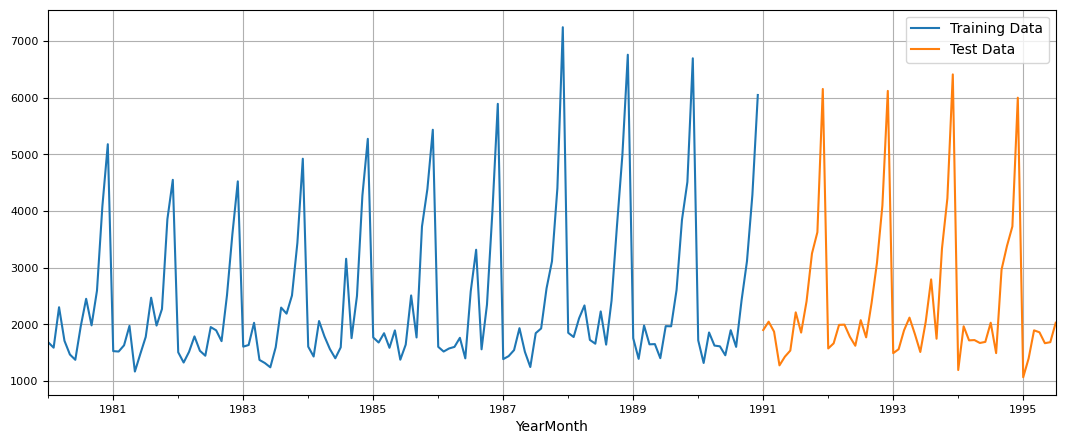

In [28]:
train['Sparkling'].plot(figsize=(13,5),fontsize = 8)
test['Sparkling'].plot(figsize =(13,5),fontsize = 8)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## Building different models and comparing the accuracy metrics.

### Model 1: Linear Regression

For this particular linear regress, we are going to regress the 'Sparkling' Variable against the order of the occurrence.  For this we need to modify our training data before fitting it into a linear regression.

In [29]:
train_time = [i+1 for i in range(len(train))]
test_time =  [i + 133 for i in range(len(test))]
print('Training Time instance','\n', train_time)
print('Test Time instance','\n', test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [30]:
test.head()

Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

In [31]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [32]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Testing Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Testing Data','\n',LinearRegression_test.tail(),'\n')


First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132 

First few rows of Testing Data 
             Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137 

Last few rows of Testing Data 
             Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187 



In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()

In [35]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)


LinearRegression()

In [36]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1
LinearRegression_test

Sparkling  time    RegOnTime
YearMonth                               
1991-01-01       1902   133  2791.652093
1991-02-01       2049   134  2797.484752
1991-03-01       1874   135  2803.317410
1991-04-01       1279   136  2809.150069
1991-05-01       1432   137  2814.982727
1991-06-01       1540   138  2820.815386
1991-07-01       2214   139  2826.648044
1991-08-01       1857   140  2832.480703
1991-09-01       2408   141  2838.313361
1991-10-01       3252   142  2844.146020
1991-11-01       3627   143  2849.978678
1991-12-01       6153   144  2855.811337
1992-01-01       1577   145  2861.643995
1992-02-01       1667   146  2867.476654
1992-03-01       1993   147  2873.309312
1992-04-01       1997   148  2879.141971
1992-05-01       1783   149  2884.974629
1992-06-01       1625   150  2890.807288
1992-07-01       2076   151  2896.639947
1992-08-01       1773   152  2902.472605
1992-09-01       2377   153  2908.305264
1992-10-01       3088   154  2914.137922
1992-11-01       4096   155  2919.970581
1992-12-01       6119   156  2925.803239
1993-01-01       1494   157  2931.635898
1993-02-01       1564   158  2937.468556
1993-03-01       1898   159  2943.301215
1993-04-01       2121   160  2949.133873
1993-05-01       1831   161  2954.966532
1993-06-01       1515   162  2960.799190
1993-07-01       2048   163  2966.631849
1993-08-01       2795   164  2972.464507
1993-09-01       1749   165  2978.297166
1993-10-01       3339   166  2984.129824
1993-11-01       4227   167  2989.962483
1993-12-01       6410   168  2995.795141
1994-01-01       1197   169  3001.627800
1994-02-01       1968   170  3007.460458
1994-03-01       1720   171  3013.293117
1994-04-01       1725   172  3019.125775
1994-05-01       1674   173  3024.958434
1994-06-01       1693   174  3030.791092
1994-07-01       2031   175  3036.623751
1994-08-01       1495   176  3042.456409
1994-09-01       2968   177  3048.289068
1994-10-01       3385   178  3054.121726
1994-11-01       3729   179  3059.954385
1994-12-01       5999   180  3065.787043
1995-01-01       1070   181  3071.619702
1995-02-01       1402   182  3077.452360
1995-03-01       1897   183  3083.285019
1995-04-01       1862   184  3089.117677
1995-05-01       1670   185  3094.950336
1995-06-01       1688   186  3100.782994
1995-07-01       2031   187  3106.615653

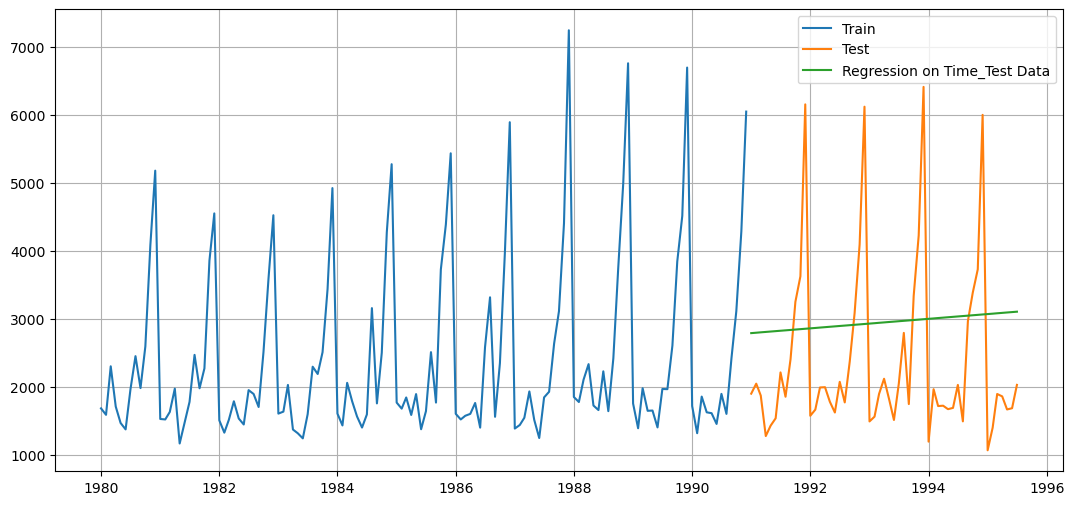

In [37]:
plt.figure(figsize=(13,6))
plt.plot(train['Sparkling'],label ='Train')
plt.plot(test['Sparkling'],label ='Test')
plt.plot(LinearRegression_test['RegOnTime'],label='Regression on Time_Test Data')
plt.legend(loc='best')
plt.grid();

### Defining the accuracy metrics.

In [38]:
from sklearn import metrics

### Model Evaluation

In [39]:
## Test Data - RMSE 

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print('For RegressionOnTime forecas on the Test Data, RMSE is %3.3f'%(rmse_model1_test))

For RegressionOnTime forecas on the Test Data, RMSE is 1389.135


In [40]:
resultDF = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultDF

Test RMSE
RegressionOnTime  1389.135175

## Model 2: Naive Approach:

#### For the particular naive model, we say that the prediction for tomorrow is same as today and the prediction for day after tomorrow is tomorrow  and since the prediction of tomorrow is same as today, therefore the prediction for day after tomorrow is also today.

In [41]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [42]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

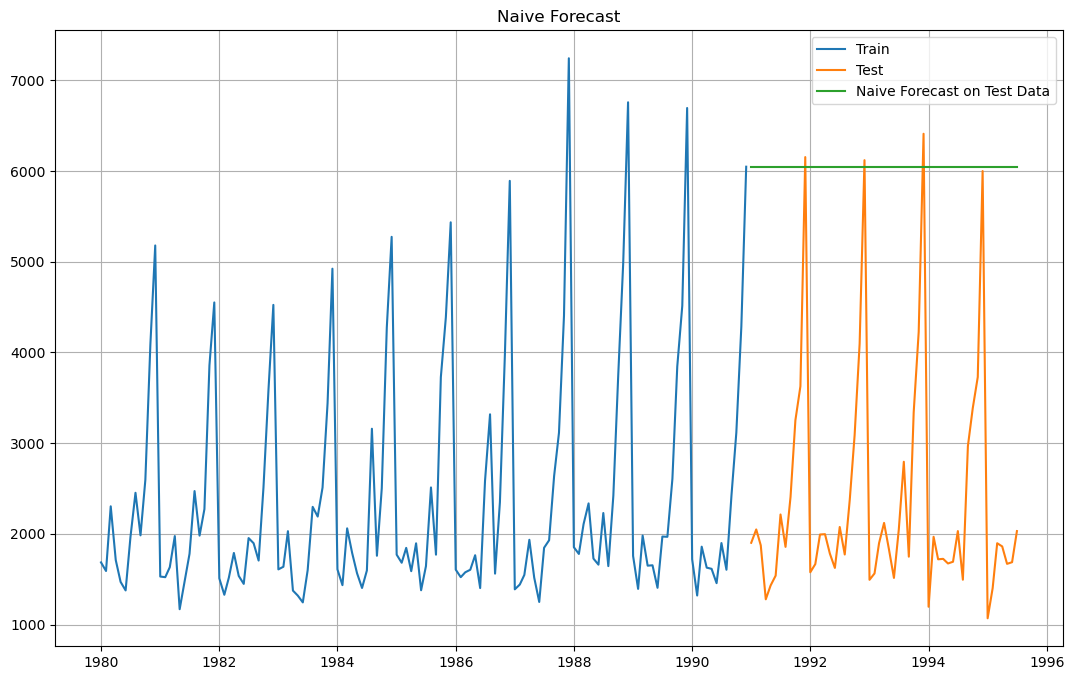

In [43]:
plt.figure(figsize=(13,8))
plt.plot(NaiveModel_train['Sparkling'],label = 'Train')
plt.plot(NaiveModel_test['Sparkling'],label = 'Test')
plt.plot(NaiveModel_test['naive'],label = 'Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title('Naive Forecast')
plt.grid();

### Model Evaluation

In [44]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print('For Naive forecast on the Test Data, RMSE is %4.3f'%(rmse_model2_test))

For Naive forecast on the Test Data, RMSE is 3864.279


In [45]:
resultDF_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]}, index=['NaiveModel'])
resultDF = pd.concat([resultDF,resultDF_2])
resultDF

Test RMSE
RegressionOnTime  1389.135175
NaiveModel        3864.279352

### Model 3: Simple Average

#### For this particular simple average mothod, we will forcast by using the average of the training values.

In [46]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [47]:
SimpleAverage_test['mean_forecast']= train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
YearMonth                           
1991-01-01       1902    2403.780303
1991-02-01       2049    2403.780303
1991-03-01       1874    2403.780303
1991-04-01       1279    2403.780303
1991-05-01       1432    2403.780303

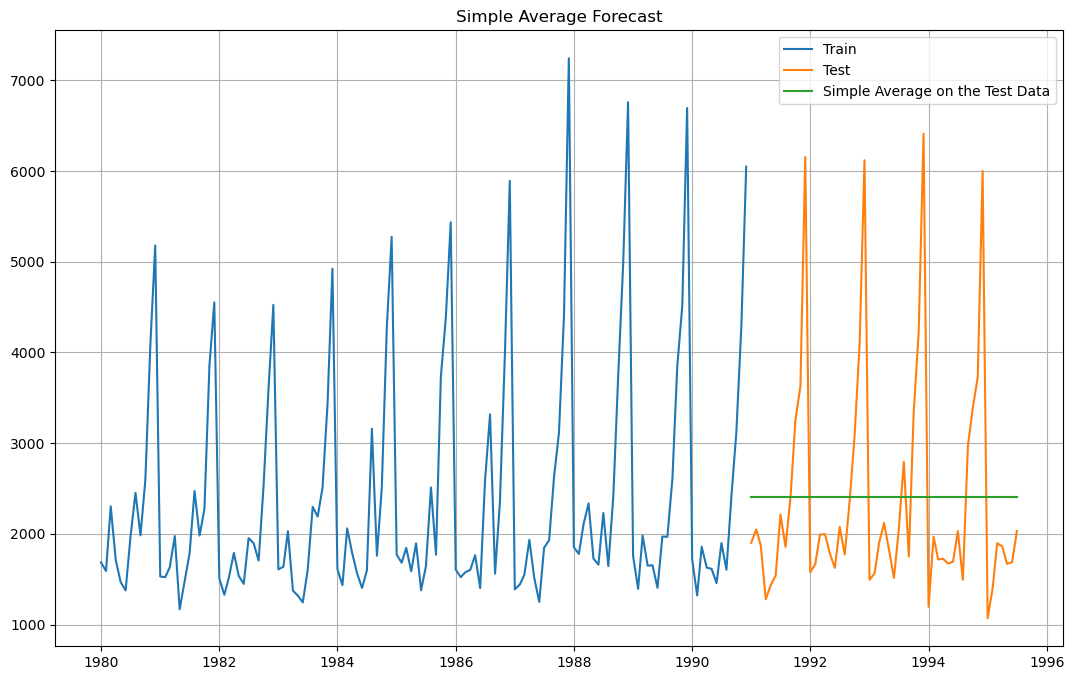

In [48]:
plt.figure(figsize=(13,8))
plt.plot(SimpleAverage_train['Sparkling'],label ='Train')
plt.plot(SimpleAverage_test['Sparkling'],label = 'Test')
plt.plot(SimpleAverage_test['mean_forecast'],label = 'Simple Average on the Test Data')
plt.legend(loc='best')
plt.title('Simple Average Forecast')
plt.grid();

### Model Evaluation

In [49]:
# Test Data - RMSE 
rmse_model3_test = metrics.mean_squared_error(SimpleAverage_test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print('For Simple Average Forecast on the Test Data, RMSE is %4.3f'%(rmse_model3_test))

For Simple Average Forecast on the Test Data, RMSE is 1275.082


In [50]:
resultDF_3 = pd.DataFrame({'Test RMSE':[rmse_model3_test]},index=['SimpleAverageModel'])

resultDF = pd.concat([resultDF,resultDF_3])
resultDF

Test RMSE
RegressionOnTime    1389.135175
NaiveModel          3864.279352
SimpleAverageModel  1275.081804

### Method 4: Moving Average(MA)

#### For Moving Average, we are going to average over the entire data.

In [51]:
MovingAverage = df.copy()
MovingAverage.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

#### Trailing Moving Average

In [52]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                            
1980-01-01       1686         NaN         NaN         NaN         NaN
1980-02-01       1591      1638.5         NaN         NaN         NaN
1980-03-01       2304      1947.5         NaN         NaN         NaN
1980-04-01       1712      2008.0     1823.25         NaN         NaN
1980-05-01       1471      1591.5     1769.50         NaN         NaN

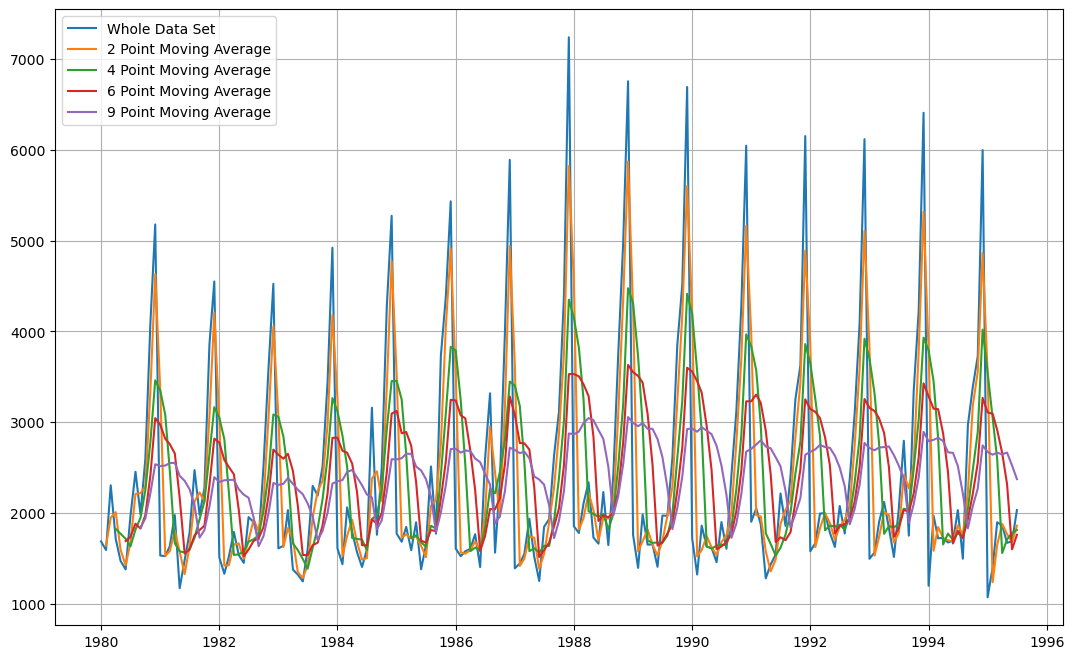

In [53]:
# Plotting on the whole data 

plt.figure(figsize=(13,8))
plt.plot(MovingAverage['Sparkling'], label = 'Whole Data Set')
plt.plot(MovingAverage['Trailing_2'], label = '2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label ='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'], label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [54]:
MovingAverage_trailing_train = MovingAverage[MovingAverage.index.year<1991]
MovingAverage_trailing_test = MovingAverage[MovingAverage.index.year>=1991]


In [55]:
print(MovingAverage_trailing_train.shape)
print(MovingAverage_trailing_test.shape)

(132, 5)
(55, 5)


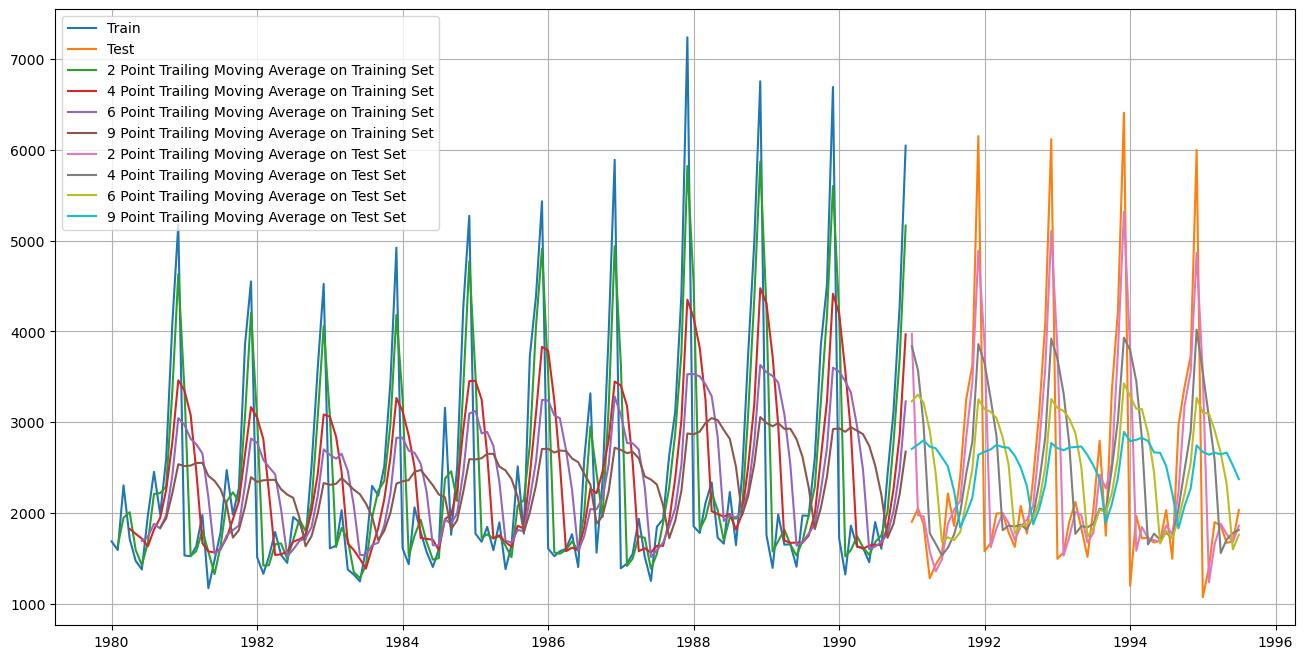

In [56]:
# Plotting on both the Training and Test data 

plt.figure(figsize=(16,8))
plt.plot(MovingAverage_trailing_train['Sparkling'],label = 'Train')
plt.plot(MovingAverage_trailing_test['Sparkling'],label = 'Test')

plt.plot(MovingAverage_trailing_train['Trailing_2'],label = '2 Point Trailing Moving Average on Training Set')
plt.plot(MovingAverage_trailing_train['Trailing_4'],label = '4 Point Trailing Moving Average on Training Set')
plt.plot(MovingAverage_trailing_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(MovingAverage_trailing_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(MovingAverage_trailing_test['Trailing_2'],label = '2 Point Trailing Moving Average on Test Set')
plt.plot(MovingAverage_trailing_test['Trailing_4'],label = '4 Point Trailing Moving Average on Test Set')
plt.plot(MovingAverage_trailing_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(MovingAverage_trailing_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

#### Model Evaluation

#### Done only on the Test Data.

In [57]:
# Test Data - RMSE - 2 point Trailing Moving Average
rmse_model4_test = metrics.mean_squared_error(MovingAverage_trailing_test['Sparkling'],MovingAverage_trailing_test['Trailing_2'],squared=False)
print('For 2 point Moving Average Model forecast on the Test data, RMSE is %3.3f'%(rmse_model4_test))
# Test Data - RMSE - 4 point Trailing Moving Average
rmse_model5_test = metrics.mean_squared_error(MovingAverage_trailing_test['Sparkling'],MovingAverage_trailing_test['Trailing_4'],squared=False)
print('For 4 point Moving Average Model forecast on the Test data, RMSE is %3.3f'%(rmse_model5_test))


# Test Data - RMSE - 6 point Trailing Moving Average
rmse_model6_test = metrics.mean_squared_error(MovingAverage_trailing_test['Sparkling'],MovingAverage_trailing_test['Trailing_6'],squared=False)
print('For 6 point Moving Average Model forecast on the Test data, RMSE is %3.3f'%(rmse_model6_test))

# Test Data - RMSE - 9 point Trailing Moving Average
rmse_model7_test = metrics.mean_squared_error(MovingAverage_trailing_test['Sparkling'],MovingAverage_trailing_test['Trailing_9'],squared=False)
print('For 9 point Moving Average Model forecast on the Test data, RMSE is %3.3f'%(rmse_model7_test))


For 2 point Moving Average Model forecast on the Test data, RMSE is 813.401
For 4 point Moving Average Model forecast on the Test data, RMSE is 1156.590
For 6 point Moving Average Model forecast on the Test data, RMSE is 1283.927
For 9 point Moving Average Model forecast on the Test data, RMSE is 1346.278


In [58]:
resultDF_4 = pd.DataFrame({'Test RMSE':[rmse_model4_test,rmse_model5_test,rmse_model6_test,rmse_model7_test]},index=['2PointTrailingMovingAverage','4PointTrailingMovingAverage','6PointTrailingMovingAverage','9PointTrailingMovingAverage'])
resultDF = pd.concat([resultDF,resultDF_4])

resultDF

Test RMSE
RegressionOnTime             1389.135175
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2PointTrailingMovingAverage   813.400684
4PointTrailingMovingAverage  1156.589694
6PointTrailingMovingAverage  1283.927428
9PointTrailingMovingAverage  1346.278315

#### Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

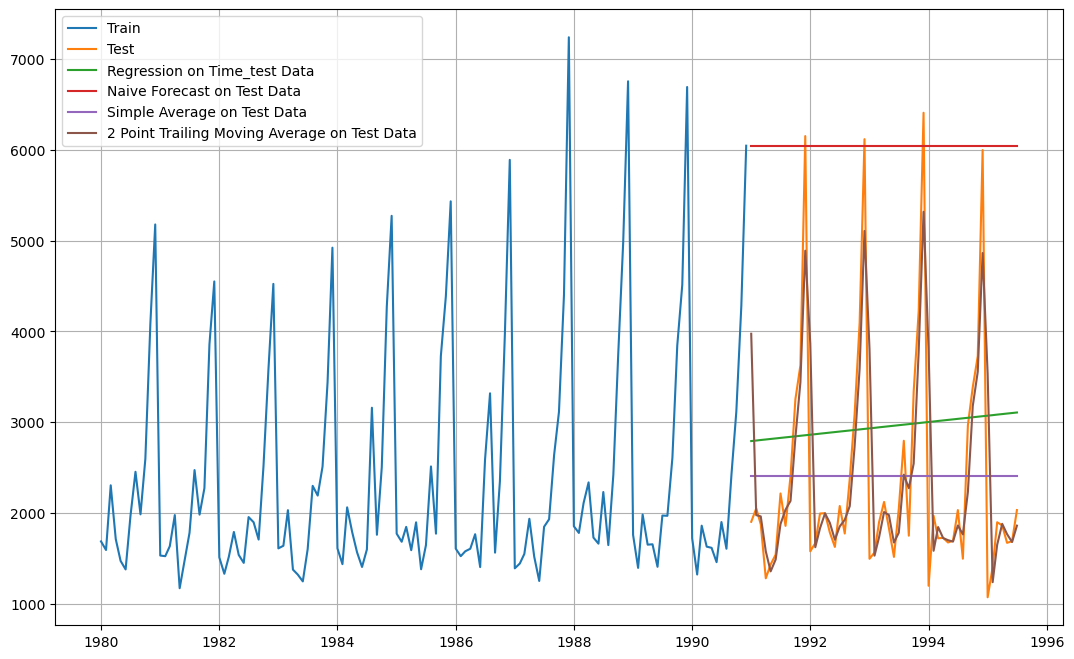

In [59]:
## plotting on both Training and Test Data

plt.figure(figsize=(13,8))
plt.plot(train['Sparkling'],label = 'Train')
plt.plot(test['Sparkling'],label = 'Test')
plt.plot(LinearRegression_test['RegOnTime'],label = 'Regression on Time_test Data')
plt.plot(NaiveModel_test['naive'],label = 'Naive Forecast on Test Data')
plt.plot(SimpleAverage_test['mean_forecast'],label = 'Simple Average on Test Data')
plt.plot(MovingAverage_trailing_test['Trailing_2'], label = '2 Point Trailing Moving Average on Test Data')
plt.legend(loc= 'best')
plt.grid();

### Method 5: Simple Exponential Smoothing

#### The Simplest of the exponentially smoothing methos is naturally called simple exponential smoothing(SES

#### This method is suitable for forecasting data with no clear trend or seasonal patter.

#### Note: Here, there is both trend and seasonlity in the data. So, we should have directly gone for the Triple Exponential Smoothing but Simple Exponential Smoothing and Double Exponential Smoothing models are built over here to get an idea of how the three types of models compare in this case.

In [60]:
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing,Holt

In [61]:
SES_train = train.copy()
SES_test = test.copy()

In [62]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'],initialization_method='estimated')

C:\Users\91988\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [63]:
model_SES_autofit = model_SES.fit(optimized=True)


C:\Users\91988\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [64]:
model_SES_autofit.params_formatted

name        param  optimized
smoothing_level  alpha     0.070284       True
initial_level      l.0  1763.840283       True

The optimized the smoothing level to be 0.07

In [65]:
model_SES_autofit.params

{'smoothing_level': 0.07028442075641193,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1763.8402828521703,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [66]:
SES_test['predict'] = model_SES_autofit.forecast(steps =len(test))
SES_test.head()

Sparkling      predict
YearMonth                         
1991-01-01       1902  2804.650301
1991-02-01       2049  2804.650301
1991-03-01       1874  2804.650301
1991-04-01       1279  2804.650301
1991-05-01       1432  2804.650301

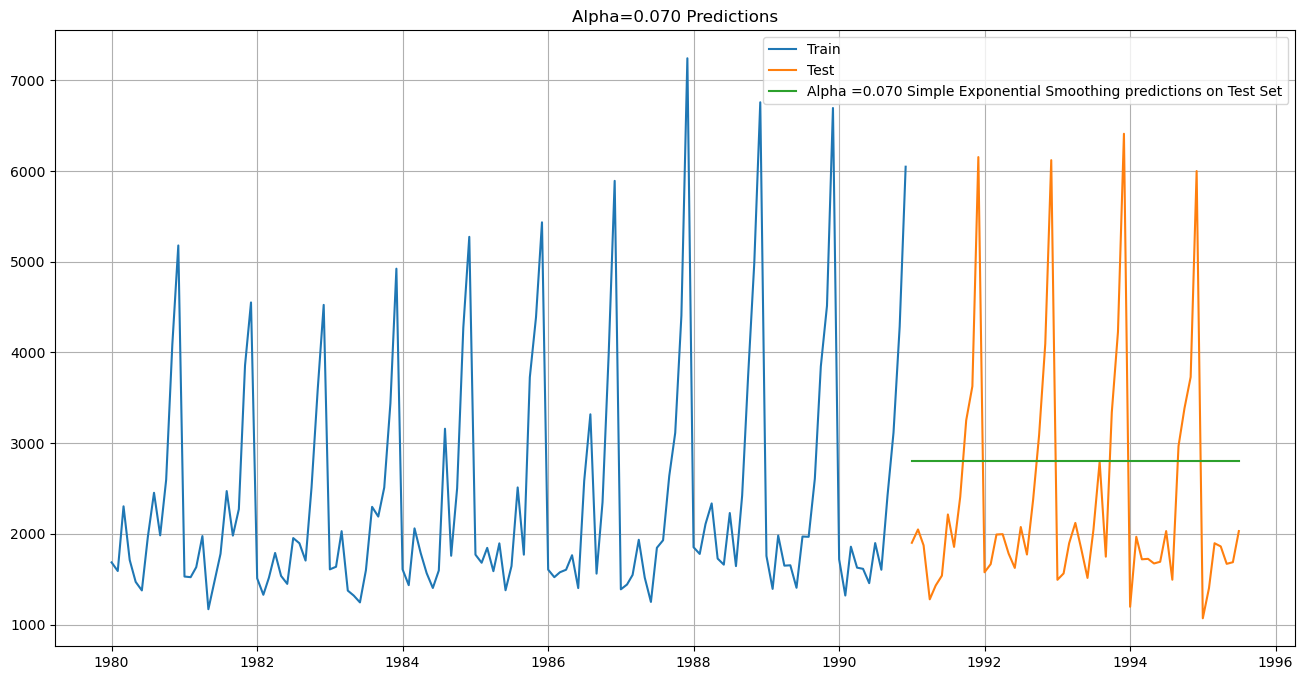

In [67]:
## plotting on both the Training and Test Data
plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'],label = 'Train')
plt.plot(SES_test['Sparkling'],label = 'Test')
plt.plot(SES_test['predict'],label ='Alpha =0.070 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc ='best')
plt.grid()
plt.title('Alpha=0.070 Predictions');

#### Model Evaluation for alpha = 0.070: Simple Exponential Smoothing

In [68]:
rmse_model8_test_1 = metrics.mean_squared_error(SES_test['Sparkling'].values,SES_test['predict'].values,squared=False)
print('For Alpha =0.070 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f'%(rmse_model8_test_1))

For Alpha =0.070 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1338.001


In [69]:
resultDF_5 = pd.DataFrame({'Test RMSE':[rmse_model8_test_1]},index=['Alpha=0.070,SimpleExponentialsSmoothing'])
resultDF= pd.concat([resultDF,resultDF_5])
resultDF

Test RMSE
RegressionOnTime                         1389.135175
NaiveModel                               3864.279352
SimpleAverageModel                       1275.081804
2PointTrailingMovingAverage               813.400684
4PointTrailingMovingAverage              1156.589694
6PointTrailingMovingAverage              1283.927428
9PointTrailingMovingAverage              1346.278315
Alpha=0.070,SimpleExponentialsSmoothing  1338.000861

#### Setting different alpha values.

#### Remember the higher the alpha value more weightage is given to the more recent observation. That means, what happen recently will happen again.

#### We will run a loop with different alpha vales to understand which particular value works best for alpha on the test set.

In [70]:
resultDF_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultDF_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [71]:
for i in np.arange(0.1,1.1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(len(test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    rmse_model5_test_i  = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    resultDF_6 = resultDF_6._append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
                                  ,'Test RMSE':rmse_model5_test_i},ignore_index = True)
    #result = pd.DataFrame({'Alpha Values':i, 'Train RMSE':rmse_model5_train_i,'Test RMSE': rmse_model5_test_i},
    #                          index=[0])
    #resultDF_6 = pd.concat([resultDF_6,result],ignore_index=True)
   

### Model Evaluation

In [72]:
resultDF_6.sort_values(by=['Test RMSE'], ascending=True)

Alpha Values   Train RMSE    Test RMSE
0           0.1  1336.428478  1375.393335
1           0.2  1356.950475  1595.206839
2           0.3  1359.953398  1935.507132
3           0.4  1352.861879  2311.919615
4           0.5  1344.203449  2666.351413
5           0.6  1338.961583  2979.204388
6           0.7  1338.969940  3249.944092
7           0.8  1344.565990  3483.801006
8           0.9  1355.815758  3686.794285
9           1.0  1373.175719  3864.279352

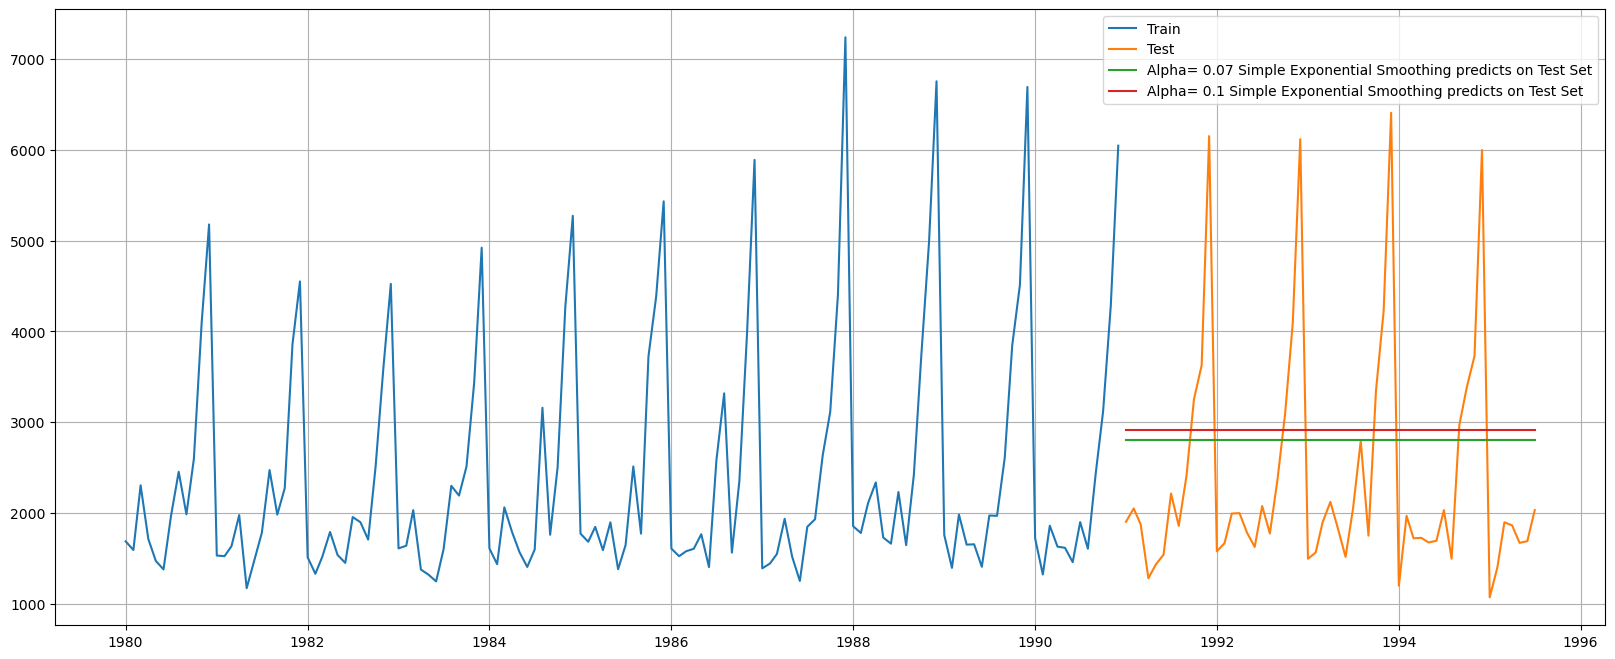

In [73]:
## plotting on both the Training and Test Dataabs

plt.plot(figsize = (18,9))
plt.plot(SES_train['Sparkling'], label = 'Train')
plt.plot(SES_test['Sparkling'],label = 'Test')
plt.plot(SES_test['predict'],label='Alpha= 0.07 Simple Exponential Smoothing predicts on Test Set')
plt.plot(SES_test['predict',0.1],label='Alpha= 0.1 Simple Exponential Smoothing predicts on Test Set')
plt.legend(loc= 'best')
plt.grid();

In [74]:
resultDF_6_1 = pd.DataFrame({'Test RMSE':[resultDF_6.sort_values(by=['Test RMSE']).values[0][2]]},index=['Alpha=0.3,SimpleExponentialSmoothing'])
resultDF= pd.concat([resultDF,resultDF_6_1])
resultDF


Test RMSE
RegressionOnTime                         1389.135175
NaiveModel                               3864.279352
SimpleAverageModel                       1275.081804
2PointTrailingMovingAverage               813.400684
4PointTrailingMovingAverage              1156.589694
6PointTrailingMovingAverage              1283.927428
9PointTrailingMovingAverage              1346.278315
Alpha=0.070,SimpleExponentialsSmoothing  1338.000861
Alpha=0.3,SimpleExponentialSmoothing     1375.393335

### Method 6: Double Exponential Smoothing (Holt's Model)

* One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend.
* This model is an extenstion of SES known as Double Exponential model which estimates two smoothing parameters.
* Applicable when data has Trend but no Seasonality.
* Two Seperate components are considered: Level and Trend.
* Level is the local mean.
* One smoothing parametes alpha corresponds to the level series
* A second smoothing parameter Beta corresponds to the trend series.

In [75]:
DES_train = train.copy()
DES_test = test.copy()

In [76]:
model_DES = Holt(DES_train['Sparkling'],initialization_method='estimated')
model_DES_autofit = model_DES.fit()
print(model_DES_autofit.params)

{'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999991, 'initial_trend': 74.87272727272739, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\91988\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\91988\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [77]:
## First we will define any empty dataframe to store our values from the loop 
resultDF_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE':[]})
resultDF_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [78]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j]=model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(len(test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        result1 = pd.DataFrame({'Alpha Values':i,'Beta Values':j, 'Train RMSE':rmse_model6_train,'Test RMSE':rmse_model6_test}
                               ,index=[0])
        resultDF_7 = pd.concat([resultDF_7,result1],ignore_index=True)

In [79]:
resultDF_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values   Train RMSE    Test RMSE
0            0.1          0.1  1373.320853  1777.734773
1            0.1          0.2  1403.485779  2599.314701
10           0.2          0.1  1413.417928  3611.766690
2            0.1          0.3  1434.781023  4287.469279
20           0.3          0.1  1428.610907  5908.185555

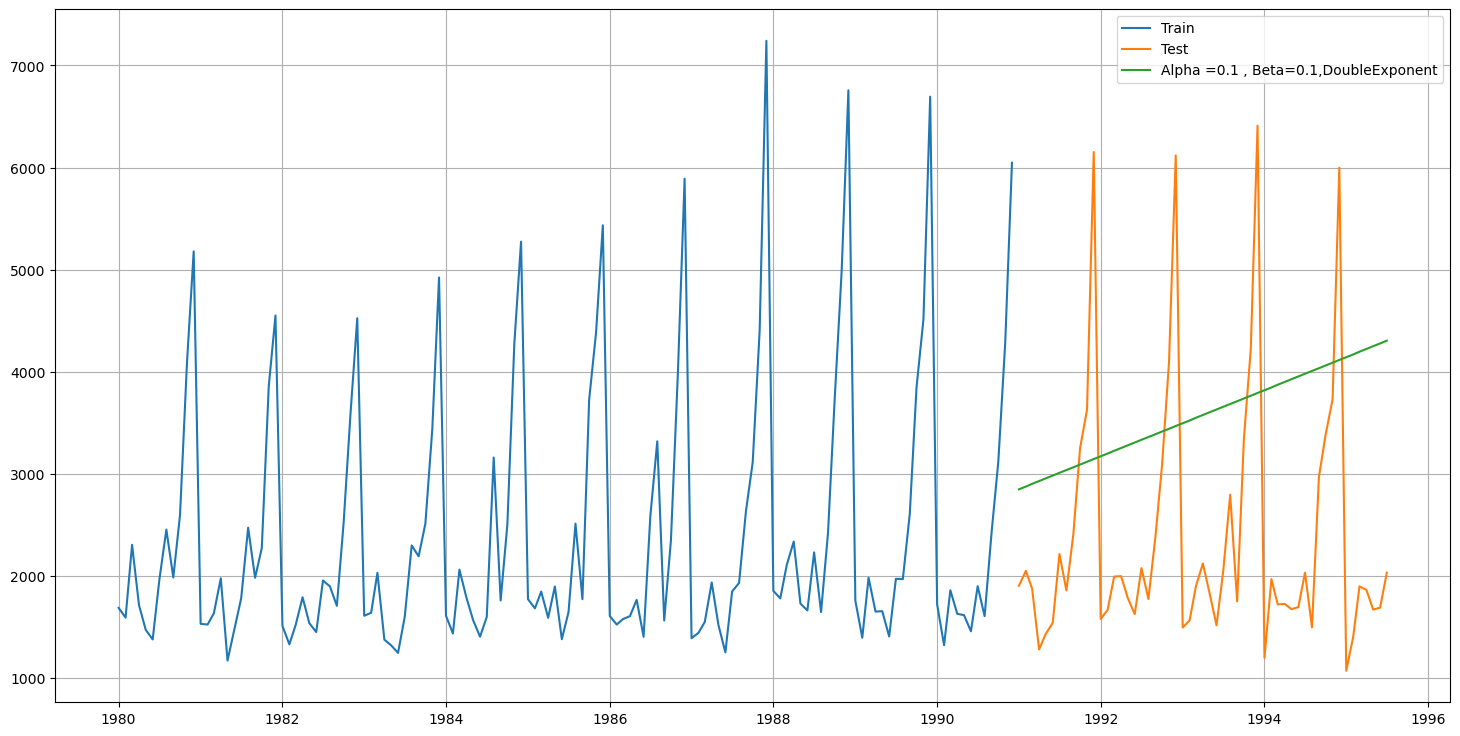

In [80]:
#plotting on both the Training and Test Data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label = 'Train')
plt.plot(DES_test['Sparkling'], label = 'Test')
plt.plot(DES_test['predict',0.1,0.1],label = 'Alpha =0.1 , Beta=0.1,DoubleExponent')
plt.legend(loc='best')
plt.grid();

In [81]:
resultDF_7_1 = pd.DataFrame({'Test RMSE':[resultDF_7.sort_values(by=['Test RMSE']).values[0][3]]},
                           index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])
resultDF = pd.concat([resultDF,resultDF_7_1])
resultDF

Test RMSE
RegressionOnTime                               1389.135175
NaiveModel                                     3864.279352
SimpleAverageModel                             1275.081804
2PointTrailingMovingAverage                     813.400684
4PointTrailingMovingAverage                    1156.589694
6PointTrailingMovingAverage                    1283.927428
9PointTrailingMovingAverage                    1346.278315
Alpha=0.070,SimpleExponentialsSmoothing        1338.000861
Alpha=0.3,SimpleExponentialSmoothing           1375.393335
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  1777.734773

### Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

#### Three parameters Alpha, Beta and Gamma are estimated in this model. Level, Trend and Seanality are accounted for this model.

In [82]:
TES_train = train.copy()
TES_test = test.copy()

In [83]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative')

C:\Users\91988\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [84]:
model_TES_autofit= model_TES.fit()

In [85]:
model_TES_autofit.params

{'smoothing_level': 0.11101471561088701,
 'smoothing_trend': 0.0493145907614654,
 'smoothing_seasonal': 0.36244934537370843,
 'damping_trend': nan,
 'initial_level': 2356.496908624238,
 'initial_trend': -9.809526161838415,
 'initial_seasons': array([0.713711  , 0.68278724, 0.90458411, 0.8053878 , 0.65571739,
        0.65388935, 0.88616088, 1.13350811, 0.91894498, 1.21186447,
        1.87099202, 2.37505867]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [86]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps = len(test))
TES_test.head()

Sparkling  auto_predict
YearMonth                          
1991-01-01       1902   1587.923122
1991-02-01       2049   1356.650595
1991-03-01       1874   1763.350752
1991-04-01       1279   1656.524633
1991-05-01       1432   1542.386930

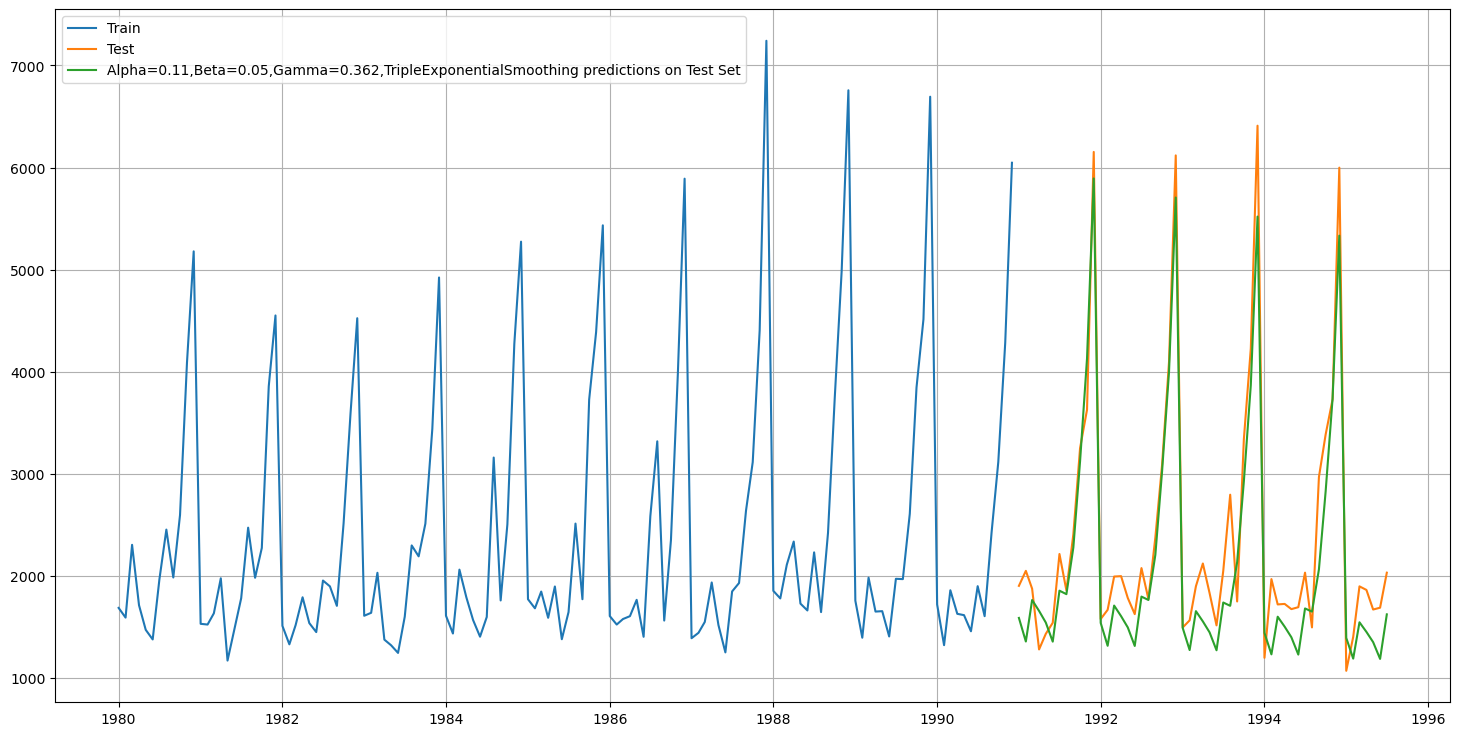

In [87]:
## Plotting on both the Training and Test using autofit 

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'],label ='Train')
plt.plot(TES_test['Sparkling'],label = 'Test')
plt.plot(TES_test['auto_predict'], label ='Alpha=0.11,Beta=0.05,Gamma=0.362,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [88]:
# TEST Data
rmse_model_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print('For Alpha=0.11,Beta=0.05,Gamma=0.362,TripleExponentialSmoothing Model forecast on the Test, Test RMSE is %3.3f'%(rmse_model_test_1))

For Alpha=0.11,Beta=0.05,Gamma=0.362,TripleExponentialSmoothing Model forecast on the Test, Test RMSE is 402.936


In [89]:
resultDF_8_1 = pd.DataFrame({'Test RMSE':[rmse_model_test_1]},index=
                           ['Alpha=0.11,Beta=0.05,Gamma=0.362,TripleExponentialSmoothing'])
resultDF = pd.concat([resultDF,resultDF_8_1])
resultDF

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2PointTrailingMovingAverage                          813.400684
4PointTrailingMovingAverage                         1156.589694
6PointTrailingMovingAverage                         1283.927428
9PointTrailingMovingAverage                         1346.278315
Alpha=0.070,SimpleExponentialsSmoothing             1338.000861
Alpha=0.3,SimpleExponentialSmoothing                1375.393335
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1777.734773
Alpha=0.11,Beta=0.05,Gamma=0.362,TripleExponent...   402.936179

In [90]:
resultDF_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE':[]})
resultDF_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [91]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] =model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            result = pd.DataFrame({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test},index=[0])
            resultDF_8_2 = pd.concat([resultDF_8_2,result],ignore_index=True)

In [92]:
resultDF_8_2

Alpha Values  Beta Values  Gamma Values    Train RMSE     Test RMSE
0             0.1          0.1           0.1  3.814397e+02  5.910387e+02
1             0.1          0.1           0.2  3.677929e+02  6.214407e+02
2             0.1          0.1           0.3  3.614334e+02  6.395595e+02
3             0.1          0.1           0.4  3.607002e+02  6.447910e+02
4             0.1          0.1           0.5  3.644451e+02  6.410980e+02
..            ...          ...           ...           ...           ...
995           1.0          1.0           0.6  1.882994e+05  4.386054e+06
996           1.0          1.0           0.7  2.660015e+05  8.649577e+06
997           1.0          1.0           0.8  1.101923e+06  2.700435e+05
998           1.0          1.0           0.9  7.695708e+04  2.472201e+05
999           1.0          1.0           1.0  2.456050e+04  1.256914e+05

[1000 rows x 5 columns]

In [93]:
resultDF_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE
301           0.4          0.1           0.2  384.467709  317.434302
211           0.3          0.2           0.2  388.544148  329.037543
200           0.3          0.1           0.1  388.220071  337.080969
110           0.2          0.2           0.1  398.482510  340.186457
402           0.5          0.1           0.3  396.598057  345.913415

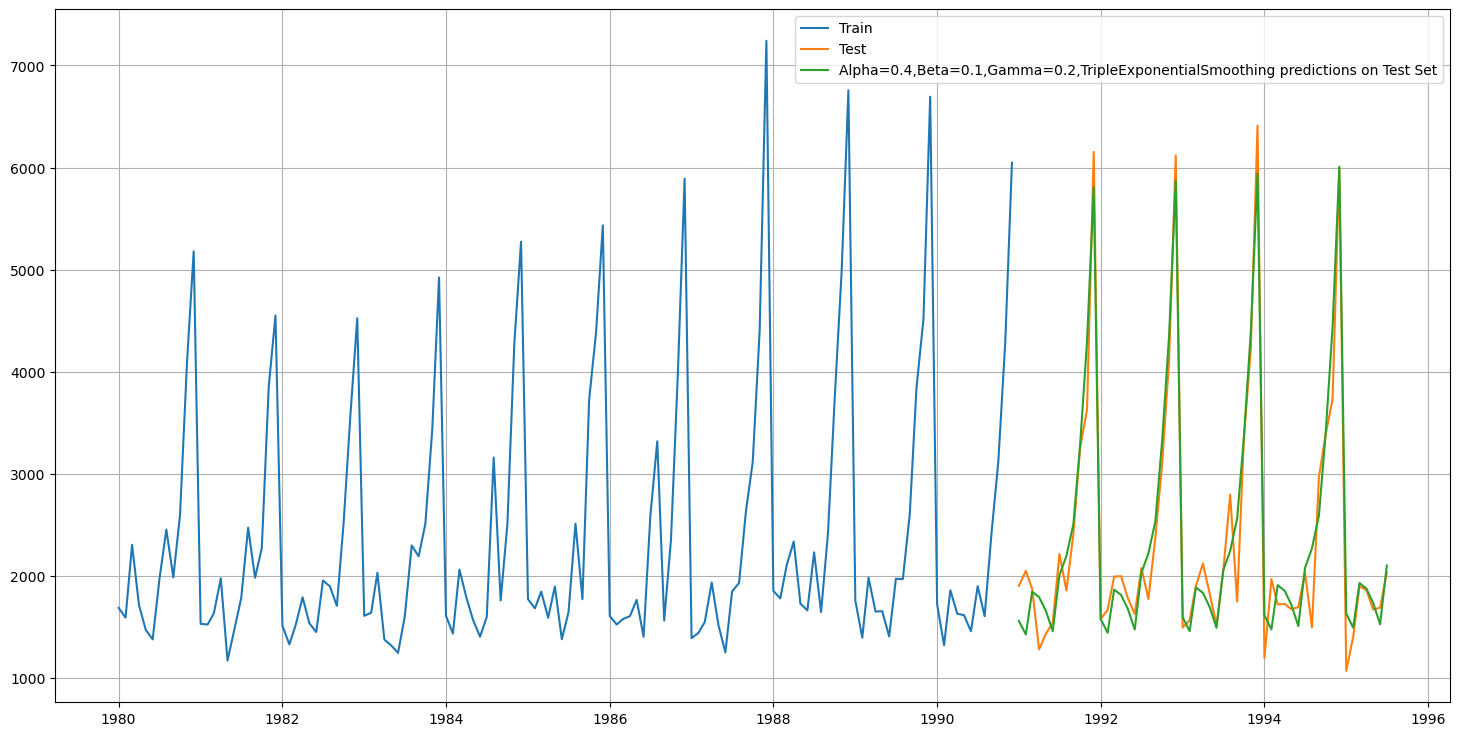

In [94]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'],label = 'Train')
plt.plot(TES_test['Sparkling'],label = 'Test')

# the value of alpha and beta is taken like that by python 
plt.plot(TES_test['predict',0.4, 0.1,0.2],label='Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [95]:
resultDF_8_3 = pd.DataFrame({'Test RMSE':[resultDF_8_2.sort_values(by=['Test RMSE']).values[0][4]]},
                           index=['Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing'])
resultDF = pd.concat([resultDF,resultDF_8_3])
resultDF

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2PointTrailingMovingAverage                          813.400684
4PointTrailingMovingAverage                         1156.589694
6PointTrailingMovingAverage                         1283.927428
9PointTrailingMovingAverage                         1346.278315
Alpha=0.070,SimpleExponentialsSmoothing             1338.000861
Alpha=0.3,SimpleExponentialSmoothing                1375.393335
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1777.734773
Alpha=0.11,Beta=0.05,Gamma=0.362,TripleExponent...   402.936179
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302

In [96]:
print('Sorted by RMSE  Values on the Test Data:','\n',)
resultDF.sort_values(by=['Test RMSE'])

Sorted by RMSE  Values on the Test Data: 



Test RMSE
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
Alpha=0.11,Beta=0.05,Gamma=0.362,TripleExponent...   402.936179
2PointTrailingMovingAverage                          813.400684
4PointTrailingMovingAverage                         1156.589694
SimpleAverageModel                                  1275.081804
6PointTrailingMovingAverage                         1283.927428
Alpha=0.070,SimpleExponentialsSmoothing             1338.000861
9PointTrailingMovingAverage                         1346.278315
Alpha=0.3,SimpleExponentialSmoothing                1375.393335
RegressionOnTime                                    1389.135175
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1777.734773
NaiveModel                                          3864.279352

For this Data, we have both trend and seasonality so by difinition Triple Exponential Smoothing is supposed to work better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing. However, since this was a model building exercise we had gone on to buld different model on the data and have compared these model with the best RMSE value on the test data.

#### We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters alpha = 1.0 Beta = 0.7 and Gamma = 0.3

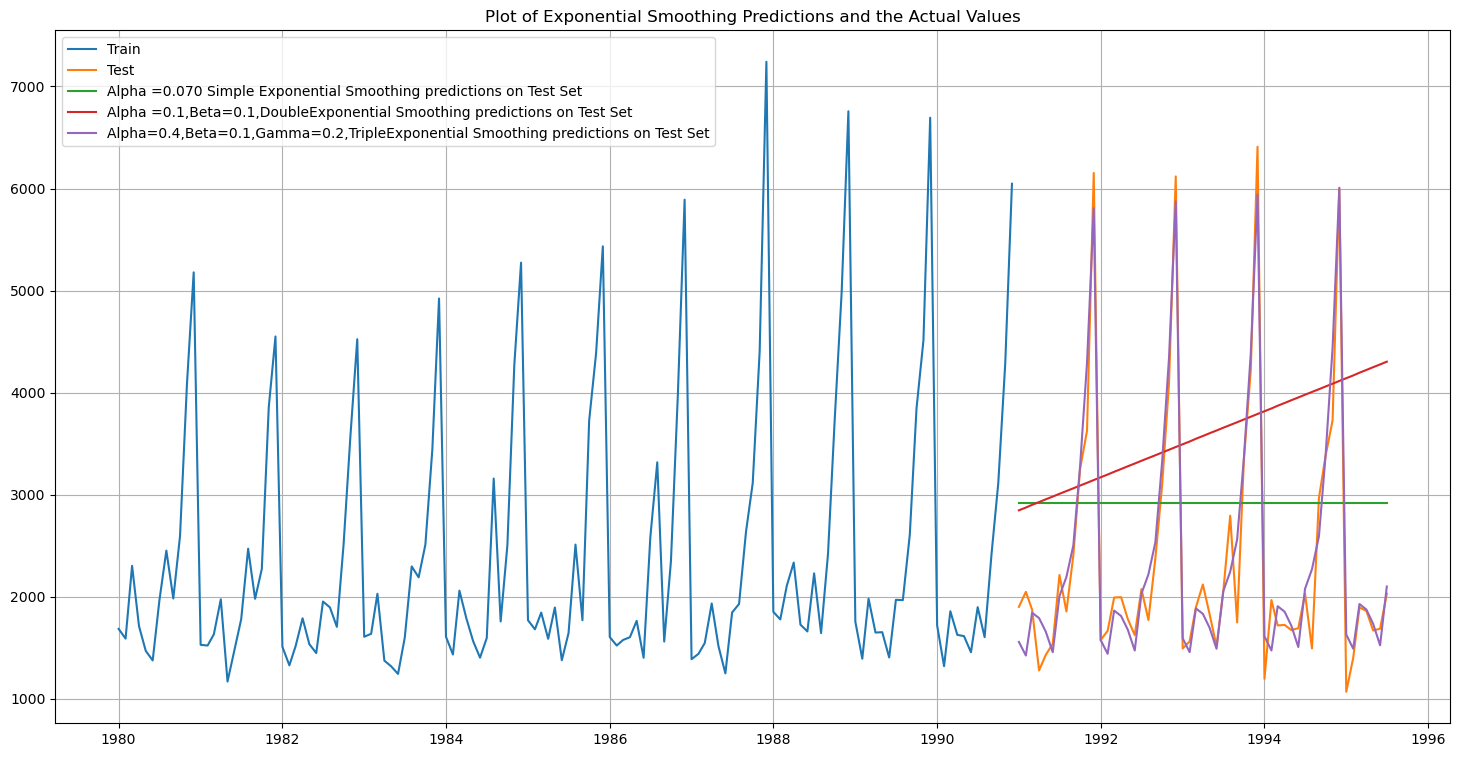

In [97]:
# plotting on both the Training and Test data 

plt.figure(figsize= (18,9))
plt.plot(train['Sparkling'],label = 'Train')
plt.plot(test['Sparkling'],label ='Test')
plt.plot(SES_test['predict',0.1],label ='Alpha =0.070 Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_test['predict',0.1,0.1],label ='Alpha =0.1,Beta=0.1,DoubleExponential Smoothing predictions on Test Set')
plt.plot(TES_test['predict',0.4,0.1,0.2],label ='Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.title('Plot of Exponential Smoothing Predictions and the Actual Values')
plt.grid();

In this particular we have built several models and went through a model building excercise. This particular exercise has given us an idea as to which particular model gives us the least error on our test set for this data.  But in Time Series Forcasting, we need to be very vigil about the fact that after we have done this exercise we need to build the model on the whole data. Remember, the training data that we have used to build the model stops much before data ends. In order to forecast using any of the models built, we need to build the models again (this time on the complete data) with the same parameters.


The Two models to be built on the whole data are the following:

* Alpha = 0.11, Beta =0.05,Gamma=0.362, TripleExponentialSmoothing
* Alpha = 0.4, Beta =0.1, Gamma =0.2, TripleExponentialSmoothing

In [98]:
fullmodel1 = ExponentialSmoothing(df,trend='additive',seasonal='multiplicative').fit(smoothing_level=0.11,
                                                                                    smoothing_trend=0.05,
                                                                                    smoothing_seasonal=0.362)

C:\Users\91988\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [99]:
RMSE_fullmodel1 = metrics.mean_squared_error(df['Sparkling'],fullmodel1.fittedvalues,squared=False)
print('RMSE:',RMSE_fullmodel1)

RMSE: 351.2829839952815


In [100]:
prediction_1 = fullmodel1.forecast(steps=12)

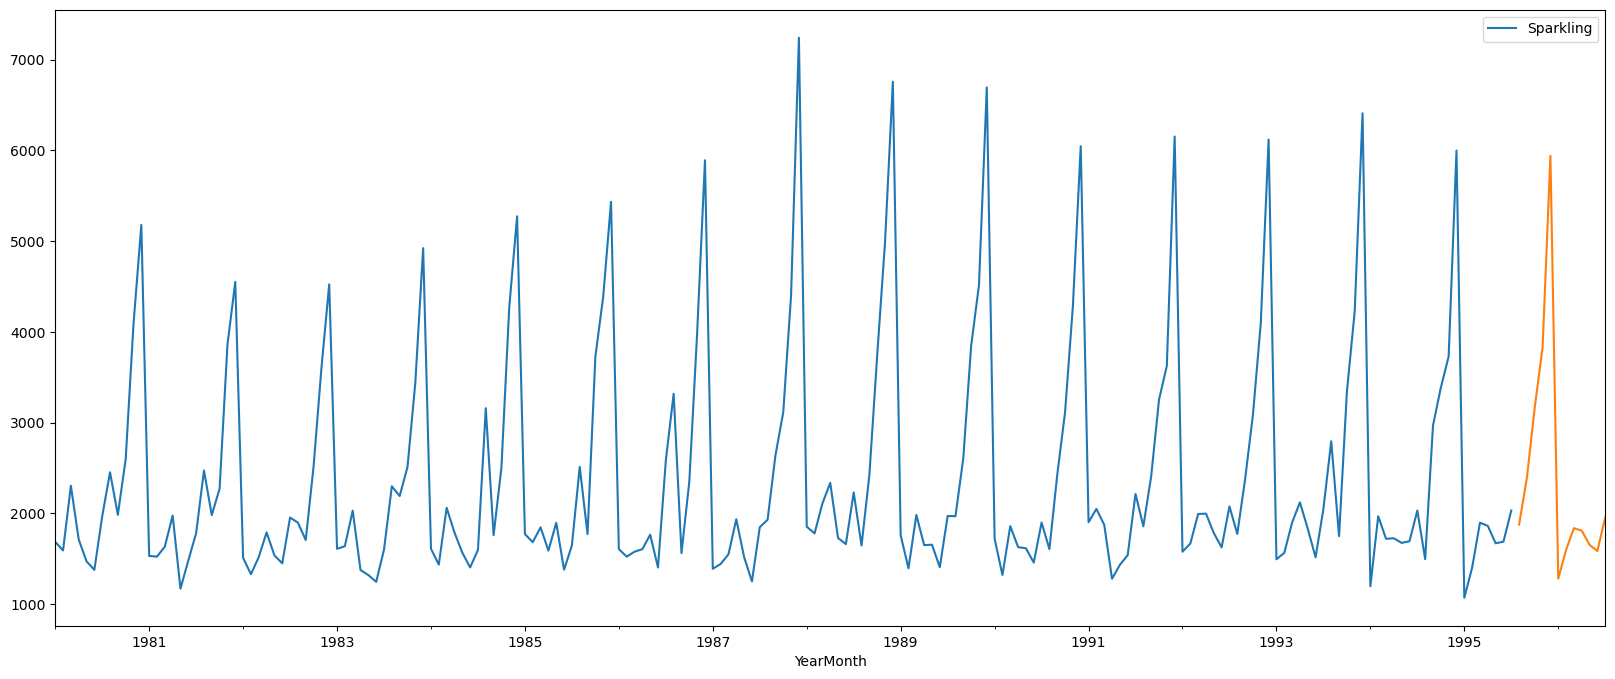

In [101]:
df.plot()
prediction_1.plot();

One assumption that we have made over here while calculating the confidence bands is that the standard deviation of the forecast distribution is almost equal to the residual standard deviation.

In [102]:
# In the below code, we have calculated the upper and lower confidence bands at 95% confidence level 
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals. 

pred_1_df = pd.DataFrame({'lower_CI':prediction_1 -1.96*np.std(fullmodel1.resid,ddof=1),
                         'prediction':prediction_1,
                         'upper_ci':prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

lower_CI   prediction     upper_ci
1995-08-01  1185.695991  1876.005750  2566.315508
1995-09-01  1703.897843  2394.207602  3084.517360
1995-10-01  2479.092754  3169.402513  3859.712271
1995-11-01  3138.736258  3829.046017  4519.355775
1995-12-01  5251.236336  5941.546094  6631.855853

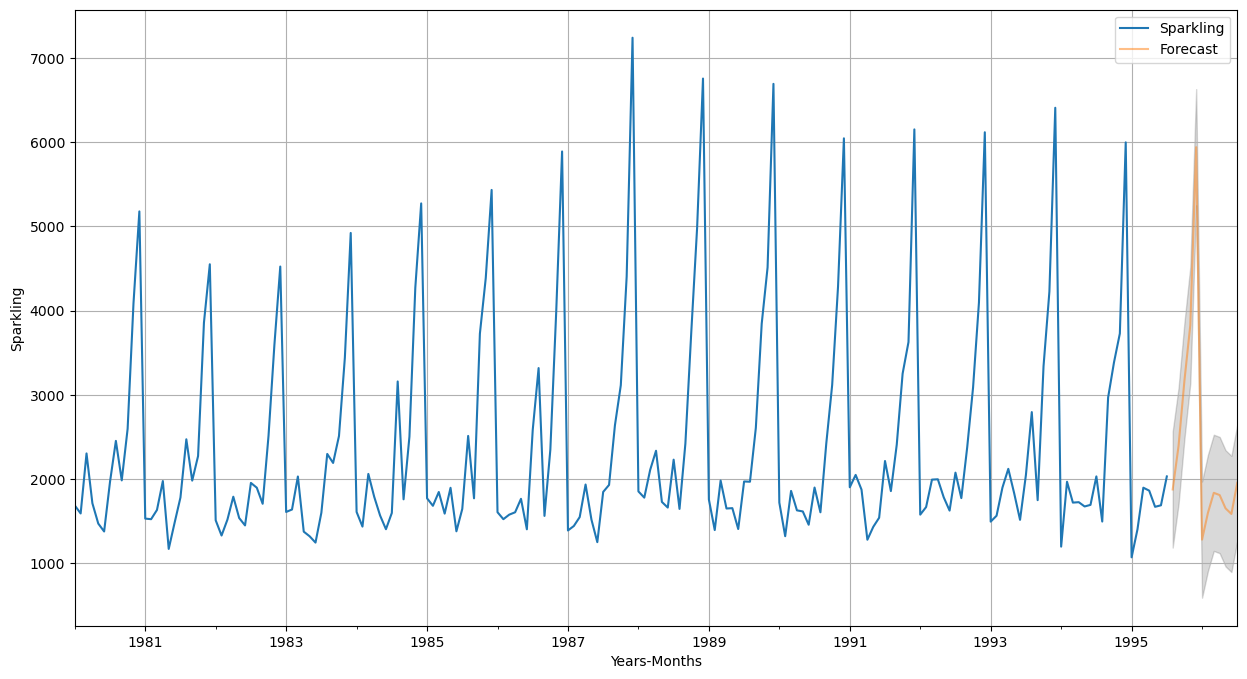

In [103]:
# plot the forecast along with the confidence band 
axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis ,label ='Forecast',alpha =0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'],pred_1_df['upper_ci'],color='k',alpha=.15)
axis.set_xlabel('Years-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid();

In [104]:
fullmodel2 = ExponentialSmoothing(df,
                                 trend='additive', seasonal='multiplicative').fit(smoothing_level=0.4,
                                                                                 smoothing_trend=0.1,
                                                                                 smoothing_seasonal=0.2)

C:\Users\91988\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [105]:
RMSE_fullmodel2 = metrics.mean_squared_error(df['Sparkling'],
                                            fullmodel2.fittedvalues,squared=False)
RMSE_fullmodel2

376.77461752184695

In [106]:
prediction_2 = fullmodel2.forecast(steps=12)

In [107]:
prediction_2

1995-08-01    2063.448972
1995-09-01    2579.407747
1995-10-01    3416.655010
1995-11-01    4304.478303
1995-12-01    6604.878330
1996-01-01    1564.540342
1996-02-01    1849.760582
1996-03-01    2098.879410
1996-04-01    2022.429244
1996-05-01    1834.540845
1996-06-01    1712.409086
1996-07-01    2176.425652
Freq: MS, dtype: float64

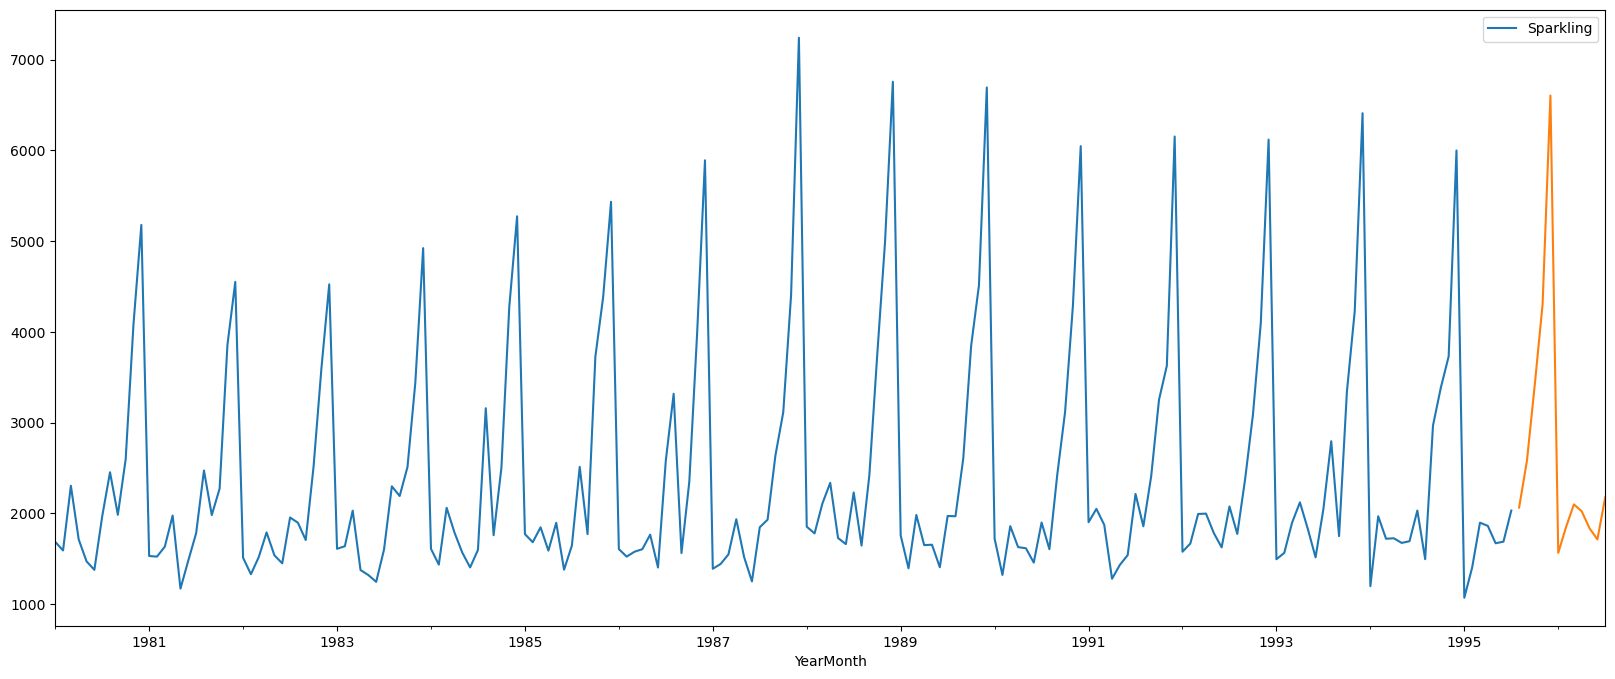

In [108]:
df.plot()
prediction_2.plot();

In [109]:
pred_2_df =pd.DataFrame({'lower_CI':prediction_2-1.96*np.std(fullmodel2.resid,ddof=1),
                       'prediction':prediction_2,
                       'upper_ci':prediction_2 + 1.96*np.std(fullmodel2.resid,ddof=1)})

pred_2_df.head()

lower_CI   prediction     upper_ci
1995-08-01  1322.989309  2063.448972  2803.908636
1995-09-01  1838.948083  2579.407747  3319.867411
1995-10-01  2676.195346  3416.655010  4157.114673
1995-11-01  3564.018640  4304.478303  5044.937967
1995-12-01  5864.418666  6604.878330  7345.337994

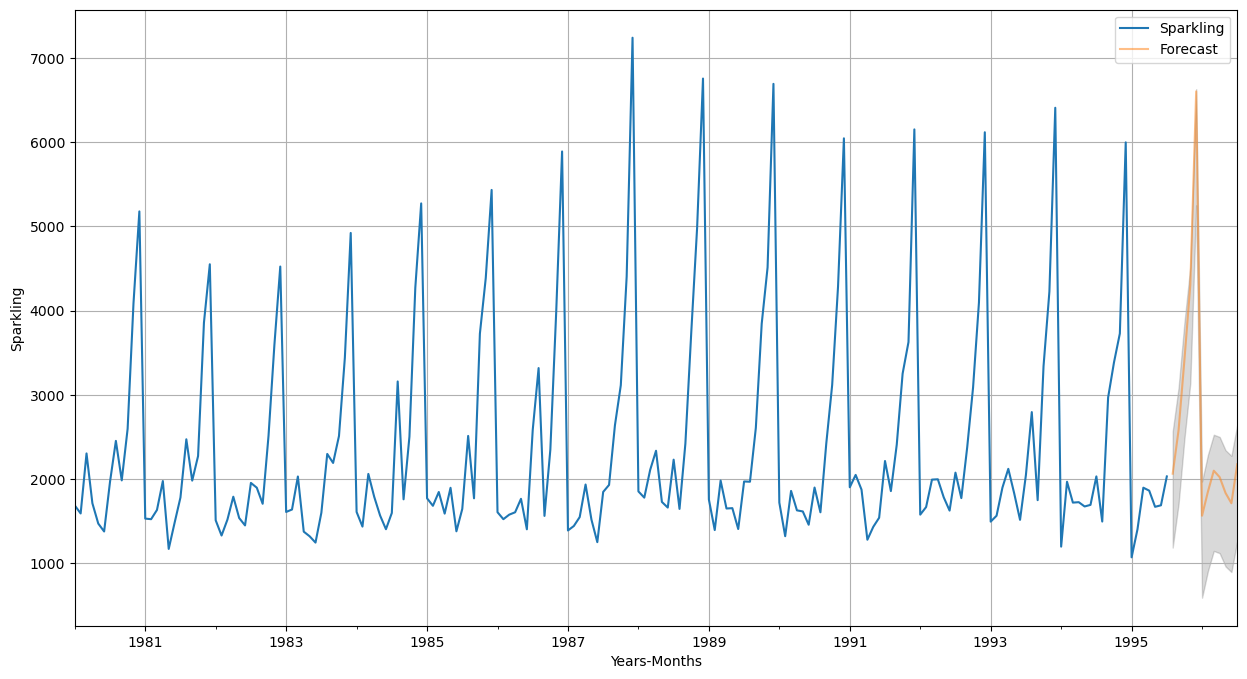

In [110]:
# plot the forecast along with the confidence band 
axis = df.plot(label='Actual', figsize=(15,8))
pred_2_df['prediction'].plot(ax=axis ,label ='Forecast',alpha =0.5)
axis.fill_between(pred_2_df.index, pred_1_df['lower_CI'],pred_1_df['upper_ci'],color='k',alpha=.15)
axis.set_xlabel('Years-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid();

In [111]:
## Test for stationarity of the series - Dicky Fuller test 
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    rollmean = timeseries.rolling(window=7).mean() # determining the rolling mean
    rollstd = timeseries.rolling(window=7).std() # determining the rolling standard deviation
    
    # plot rolling statistics:
    orig = plt.plot(timeseries,color='blue',label ='Original')
    mean = plt.plot(rollmean, color='red',label = 'Rolling Mean')
    std = plt.plot(rollstd, color ='black',label ='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.grid()
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used:','Number of Observation Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)' %key] = value
    print(dfoutput,'\n')

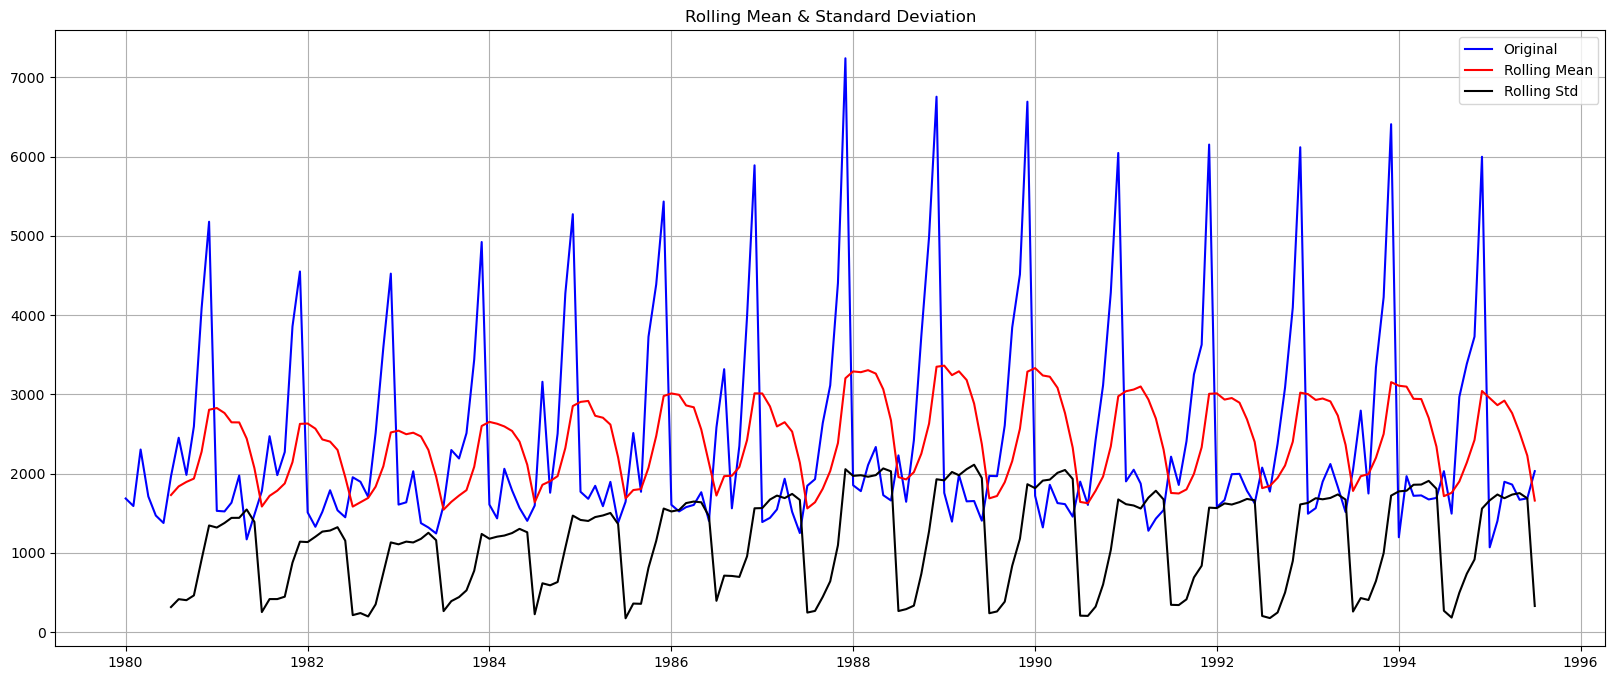

Results of Dickey-Fuller Test:
Test Statistic                 -1.360497
p-value                         0.601061
#Lags Used:                    11.000000
Number of Observation Used    175.000000
Critical value (1%)            -3.468280
Critical value (5%)            -2.878202
Critical value (10%)           -2.575653
dtype: float64 



In [112]:
test_stationarity(df['Sparkling'])

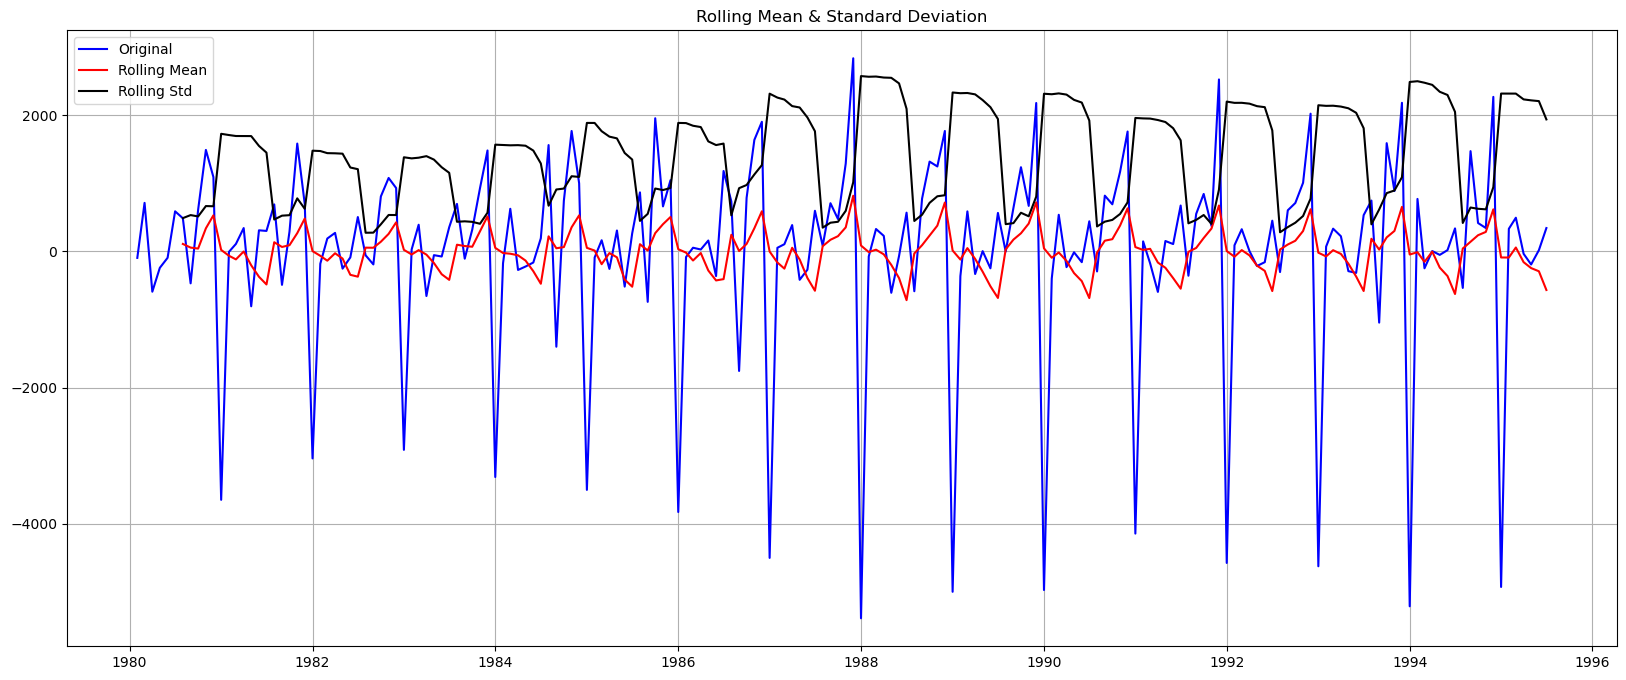

Results of Dickey-Fuller Test:
Test Statistic                -45.050301
p-value                         0.000000
#Lags Used:                    10.000000
Number of Observation Used    175.000000
Critical value (1%)            -3.468280
Critical value (5%)            -2.878202
Critical value (10%)           -2.575653
dtype: float64 



In [113]:
test_stationarity(df['Sparkling'].diff().dropna())

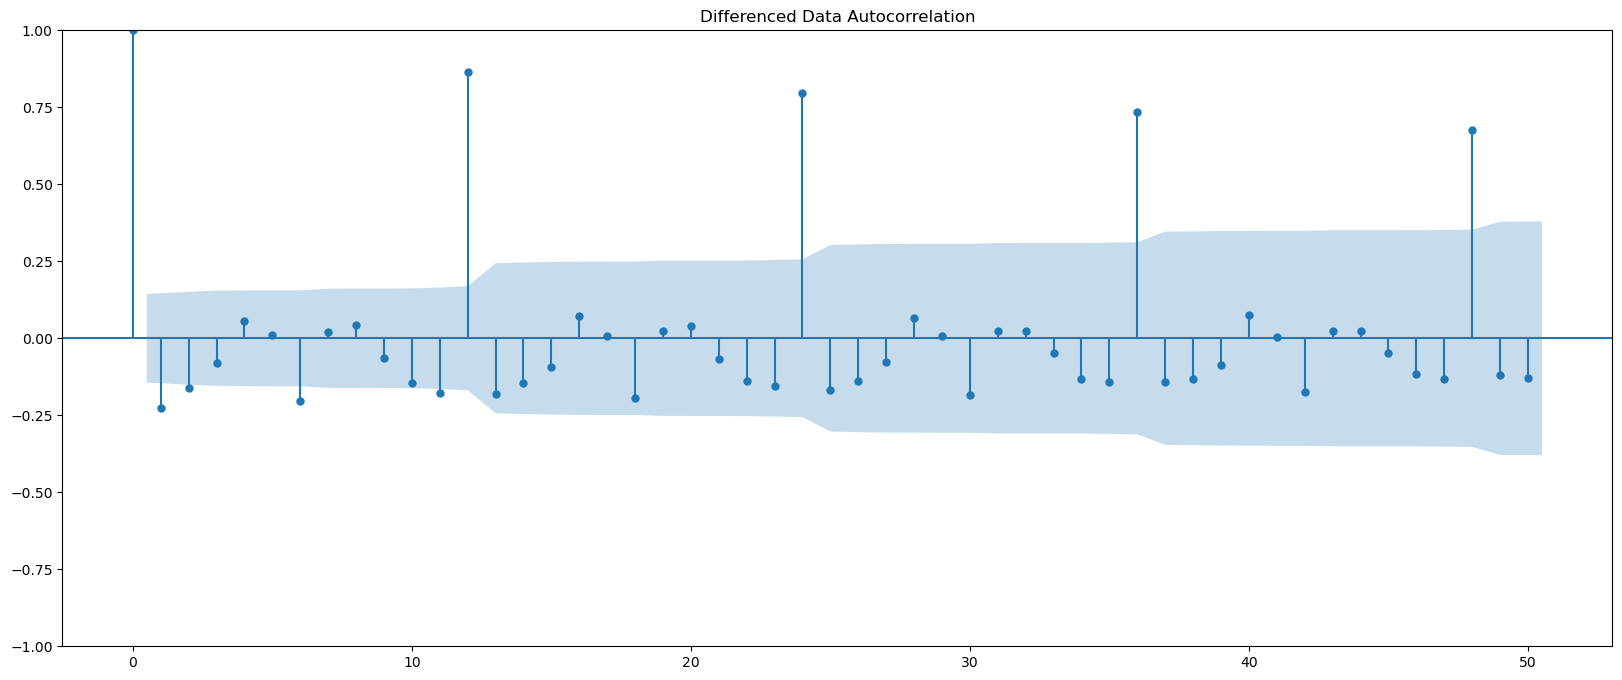

In [114]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Sparkling'].diff().dropna(),lags=50, title ='Differenced Data Autocorrelation')
plt.show()

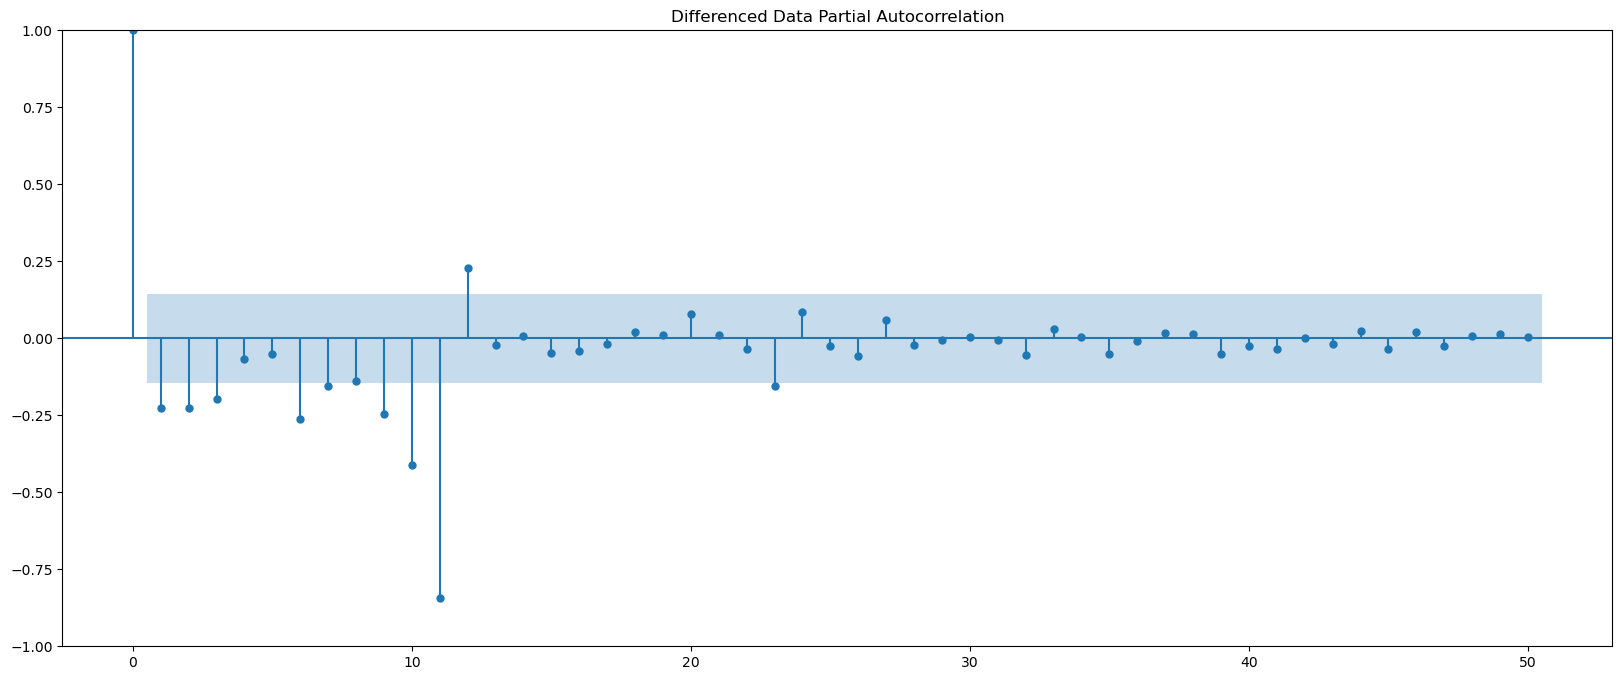

In [115]:
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

### 6.	Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [116]:
from statsmodels.tsa.arima_model import ARIMA
import itertools
p=q=range(0,3)
d= range(1,2)
pdq = list(itertools.product(p,d,q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model:{}'.format(pdq[i]))

Some parameter combinations for the Model...
Model:(0, 1, 1)
Model:(0, 1, 2)
Model:(1, 1, 0)
Model:(1, 1, 1)
Model:(1, 1, 2)
Model:(2, 1, 0)
Model:(2, 1, 1)
Model:(2, 1, 2)


In [117]:
ARIMA_AIC = pd.DataFrame(columns=['param','AIC'])
print(ARIMA_AIC)

Empty DataFrame
Columns: [param, AIC]
Index: []


In [118]:
from statsmodels.tsa.arima.model import ARIMA
for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC._append({'param':param,'AIC':ARIMA_model.aic},ignore_index=True)
#    result = pd.DataFrame({'Parameters':[param],'AIC':[ARIMA_model.aic]})
#    ARIMA_AIC = pd.concat([ARIMA_AIC,result])

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.0600155918555
ARIMA(0, 1, 2) - AIC:2234.4083231303816
ARIMA(1, 1, 0) - AIC:2266.6085393190097
ARIMA(1, 1, 1) - AIC:2235.7550946734245
ARIMA(1, 1, 2) - AIC:2234.527200450945
ARIMA(2, 1, 0) - AIC:2260.365743968097
ARIMA(2, 1, 1) - AIC:2233.777626299803
ARIMA(2, 1, 2) - AIC:2213.509218065467


In [119]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2213.509218
7  (2, 1, 1)  2233.777626
2  (0, 1, 2)  2234.408323
5  (1, 1, 2)  2234.527200
4  (1, 1, 1)  2235.755095
6  (2, 1, 0)  2260.365744
1  (0, 1, 1)  2263.060016
3  (1, 1, 0)  2266.608539
0  (0, 1, 0)  2267.663036

In [120]:
auto_ARIMA =ARIMA(train['Sparkling'],order=(2,1,2))
result_auto_ARIMA = auto_ARIMA.fit()
print(result_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 22 Oct 2023   AIC                           2213.509
Time:                        16:30:55   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3120      0.046     28.780      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.742      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.217      0.0

C:\Users\91988\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\91988\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\91988\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [121]:
predicted_auto_ARIMA = result_auto_ARIMA.forecast(steps=len(test))

In [122]:
rmse = metrics.mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
print(rmse)

1299.968133578823


In [123]:
resultDF = pd.DataFrame({'RMSE':[rmse]},
                       index=['ARIMA(2,1,2)'])
resultDF

RMSE
ARIMA(2,1,2)  1299.968134

In [124]:
p=q=range(0,3)
d=range(1,2)
D =range(0,1)
pdq = list(itertools.product(p,d,q))
model_pdq =[(x[0],x[1],x[2],6) for x in list(itertools.product(p,D,q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i],model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [125]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal','AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [126]:
import statsmodels.api as sm 

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                               order=param,
                                               seasonal_order=param_seasonal,
                                               enforce_stationarity=False,
                                               enfore_invertibility= False)
        result_SARIMA = SARIMA_model.fit(maxiter =1000)
        print('SARIMA{}x{} - AIC:{}'.format(param,param_seasonal,result_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC._append({'param':param,'seasonal':param_seasonal,'AIC':result_SARIMA.aic},ignore_index=True)
#        result = pd.DataFrame({'Parameter':[param],'Seasonal':[param_seasonal],'AIC':[result_SARIMA.aic]},index=[1])
#        SARIMA_AIC= pd.concat([SARIMA_AIC,result],ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.3780760902273
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1956.6723104334906
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.560233523096
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360113770397
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.4012986872267
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.1993619788764
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.917781152229
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.162907726694
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.5652858828616
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.9761494222148
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2136.115040447628
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.5180849912413
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1856.3835647029694
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1799.3268005187467
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.7717935999672
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1747.237792702602
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AI

In [127]:
SARIMA_AIC.sort_values(by=['AIC'],ignore_index=True)

param      seasonal          AIC
0   (0, 1, 2)  (2, 0, 2, 6)  1730.507125
1   (1, 1, 2)  (2, 0, 2, 6)  1730.873626
2   (2, 1, 2)  (2, 0, 2, 6)  1739.693835
3   (2, 1, 1)  (2, 0, 2, 6)  1744.040758
4   (0, 1, 1)  (2, 0, 2, 6)  1747.237793
..        ...           ...          ...
76  (1, 1, 1)  (0, 0, 0, 6)  2202.345062
77  (2, 1, 0)  (0, 0, 0, 6)  2227.302762
78  (0, 1, 1)  (0, 0, 0, 6)  2230.162908
79  (1, 1, 0)  (0, 0, 0, 6)  2250.318127
80  (0, 1, 0)  (0, 0, 0, 6)  2251.359720

[81 rows x 3 columns]

In [128]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                         order=(0,1,2),
                                         seasonal_order=(2,0,2,6),
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)
result_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(result_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -856.944
Date:                           Sun, 22 Oct 2023   AIC                           1727.889
Time:                                   16:31:20   BIC                           1747.164
Sample:                                        0   HQIC                          1735.713
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7851      0.103     -7.654      0.000      -0.986      -0.584
ma.L2         -0.0975      0.112     -0.870

In [129]:
predicted_auto_SARIMA_6 = result_auto_SARIMA_6.get_forecast(steps = len(test))

In [130]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1375.656633  384.084166     622.865501    2128.447765
1  1116.751594  392.851369     346.777059    1886.726128
2  1667.624322  395.424399     892.606741    2442.641903
3  1528.381331  397.983889     748.347242    2308.415421
4  1372.290762  400.527078     587.272113    2157.309410

In [131]:
rmse = metrics.mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

601.2276071295697


In [132]:
temp_resultDF = pd.DataFrame({'RMSE':rmse},
                            index=['SARIMA(0,1,2)(2,0,2,6)'])
resultDF = pd.concat([resultDF,temp_resultDF])
resultDF

RMSE
ARIMA(2,1,2)            1299.968134
SARIMA(0,1,2)(2,0,2,6)   601.227607

In [133]:
p=q=range(0,3)
d=range(1,2)
D =range(0,1)
pdq = list(itertools.product(p,d,q))
model_pdq =[(x[0],x[1],x[2],12) for x in list(itertools.product(p,D,q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i],model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [134]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal','AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [135]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                               order=param,
                                               seasonal_order=param_seasonal,
                                               enforce_stationarity=False,
                                               enfore_invertibility= False)
        result_SARIMA = SARIMA_model.fit(maxiter =1000)
        print('SARIMA{}x{} - AIC:{}'.format(param,param_seasonal,result_SARIMA.aic))
        SARIMA_AIC =SARIMA_AIC._append({'param':param,'seasonal':param_seasonal,'AIC':result_SARIMA.aic},ignore_index=True)
#        result = pd.DataFrame({'Parameter':[param],'Seasonal':[param_seasonal],'AIC':[result_SARIMA.aic]},index=[0,1,2])
#        SARIMA_AIC= pd.concat([SARIMA_AIC,result],ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616817384
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1722.597765486221
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.436602245668
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301678577
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1630.7919062802976
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.8469787650154
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1631.9376188264198
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907726694
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1924.078405275175
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1690.6664409431037
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.8219941293285
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1744.27554437972
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1574.687421654312
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1608.653627417189
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245087057736
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.3683740413917
SARIMA(0, 1, 2)x(0

In [136]:
SARIMA_AIC.sort_values(by=['AIC'],ignore_index=True)

param       seasonal          AIC
0   (0, 1, 2)  (1, 0, 2, 12)  1557.160507
1   (2, 1, 2)  (1, 0, 2, 12)  1559.548839
2   (2, 1, 2)  (2, 0, 2, 12)  1560.133009
3   (0, 1, 2)  (2, 0, 2, 12)  1560.354285
4   (1, 1, 2)  (1, 0, 2, 12)  1563.560147
..        ...            ...          ...
76  (1, 1, 1)  (0, 0, 0, 12)  2202.345062
77  (2, 1, 0)  (0, 0, 0, 12)  2227.302762
78  (0, 1, 1)  (0, 0, 0, 12)  2230.162908
79  (1, 1, 0)  (0, 0, 0, 12)  2250.318127
80  (0, 1, 0)  (0, 0, 0, 12)  2251.359720

[81 rows x 3 columns]

In [137]:
auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                         order=(0,1,2),
                                         seasonal_order=(1,0,2,12),
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)
result_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(result_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -772.580
Date:                            Sun, 22 Oct 2023   AIC                           1557.161
Time:                                    16:32:01   BIC                           1573.027
Sample:                                         0   HQIC                          1563.588
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7749      0.101     -7.707      0.000      -0.972      -0.578
ma.L2         -0.1321      0.123   

In [138]:
predicted_auto_SARIMA_12 = result_auto_SARIMA_12.get_forecast(steps=len(test))

In [139]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1425.044383  396.084727     648.732583    2201.356182
1  1241.866408  406.007202     446.106914    2037.625902
2  1711.556729  407.638374     912.600197    2510.513261
3  1589.167079  409.293445     786.966668    2391.367490
4  1448.321269  410.943403     642.887000    2253.755538

In [140]:
rmse =metrics.mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

507.86749983976716


In [141]:
temp_resultDF = pd.DataFrame({'RMSE':[rmse]},
                            index=['SARIMA(0,1,2)(1,0,2,12)'])
resultDF = pd.concat([resultDF,temp_resultDF])
resultDF

RMSE
ARIMA(2,1,2)             1299.968134
SARIMA(0,1,2)(2,0,2,6)    601.227607
SARIMA(0,1,2)(1,0,2,12)   507.867500

In [142]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                           order=(0,1,2),
                                           seasonal_order=(1,0,2,12),
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
result_full_data_model = full_data_model.fit(maxiter=1000)
print(result_full_data_model.summary())

C:\Users\91988\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\91988\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(1, 0, 2, 12)   Log Likelihood               -1174.374
Date:                            Sun, 22 Oct 2023   AIC                           2360.749
Time:                                    16:32:02   BIC                           2379.162
Sample:                                01-01-1980   HQIC                          2368.226
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9257      0.105     -8.778      0.000      -1.132      -0.719
ma.L2         -0.1223      0.086   

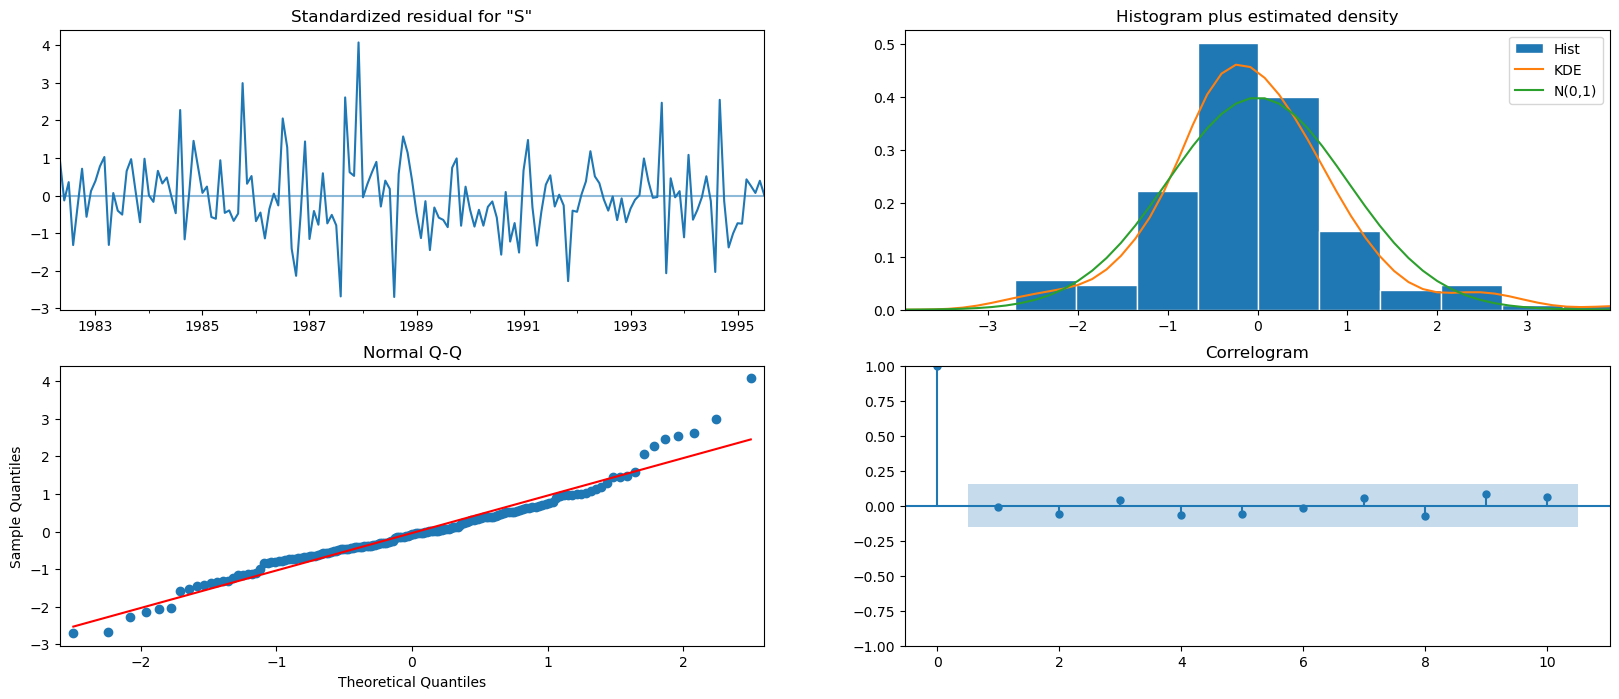

In [143]:
result_full_data_model.plot_diagnostics();

In [144]:
predicted_manual_SARIMA_12_full_data = result_full_data_model.get_forecast(steps=12)

In [145]:
predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05)

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  1841.603719  382.492352    1091.932485    2591.274952
1995-09-01  2492.873270  387.265254    1733.847320    3251.899220
1995-10-01  3324.301581  387.665509    2564.491145    4084.112016
1995-11-01  4015.785130  388.065351    3255.191018    4776.379242
1995-12-01  6278.887251  388.464786    5517.510262    7040.264240
1996-01-01  1247.430575  388.863827     485.271478    2009.589671
1996-02-01  1541.867501  389.262583     778.926859    2304.808144
1996-03-01  1826.029723  389.661209    1062.307787    2589.751660
1996-04-01  1794.780678  390.058977    1030.279131    2559.282226
1996-05-01  1634.583265  390.456361     869.302860    2399.863670
1996-06-01  1572.222224  390.853346     806.163743    2338.280705
1996-07-01  2005.679015  391.249930    1238.843243    2772.514787

In [146]:
rmse = metrics.mean_squared_error(df['Sparkling'],result_full_data_model.fittedvalues,squared=False)
print('RMSE of Full Model ',rmse)

RMSE of Full Model  534.763907243463


In [147]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='01/08/1995',end='01/07/1996',freq='M'))

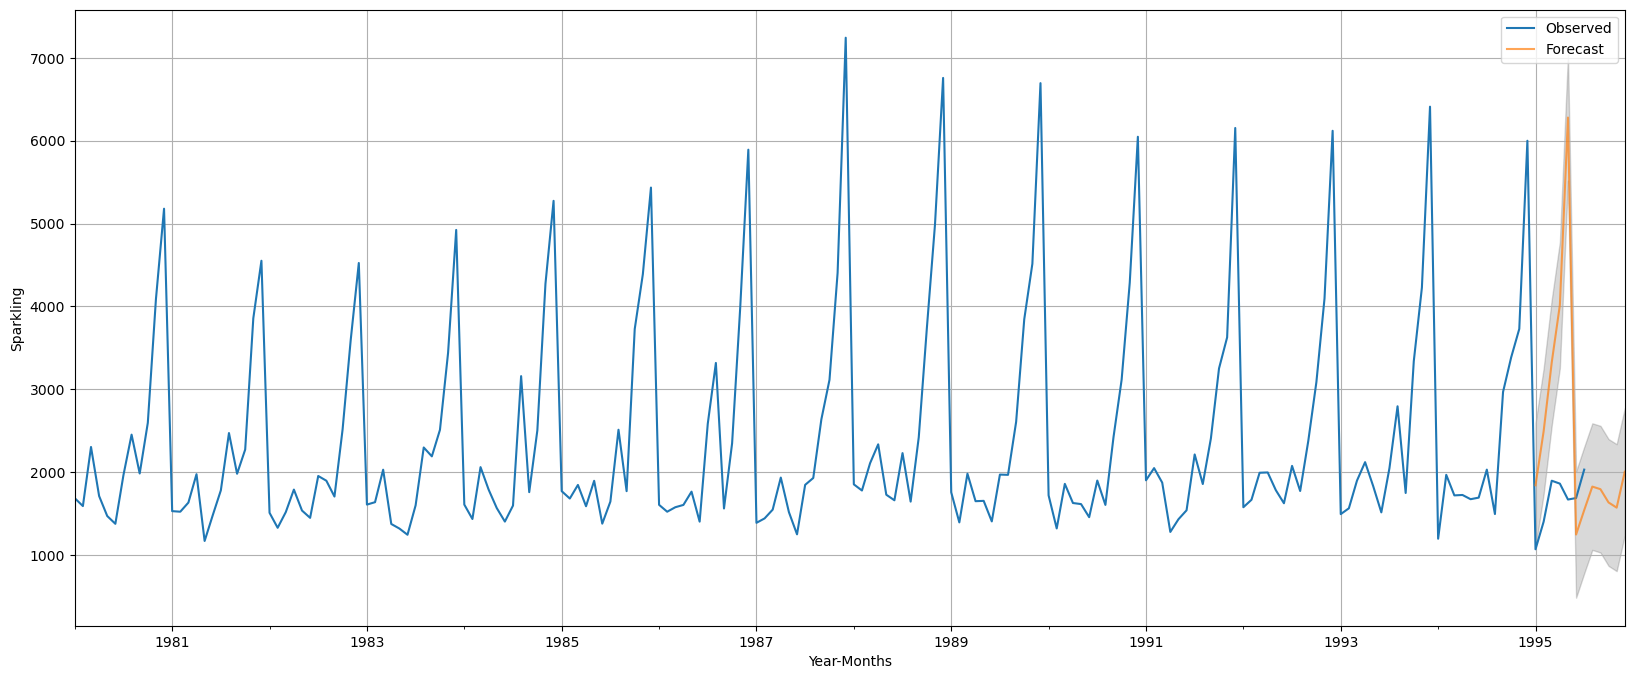

In [148]:
axis = df['Sparkling'].plot(label ='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis,label='Forecast',alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index,pred_full_manual_SARIMA_date['mean_ci_lower'],
                 pred_full_manual_SARIMA_date['mean_ci_upper'],color='k',alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid();